# Operazioni preliminari

Carichiamo le librerie necessarie.

In [ ]:
!pip install matplotlib --upgrade

In [1]:
import tarfile
import bz2
import pandas as pd
import statsmodels.api as sm
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.decomposition import PCA
from google.colab import drive
pd.set_option('display.max_columns', None)

In [3]:
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


Estraiamo il file .tar.

In [ ]:
my_tar = tarfile.open('/content/gdrive/MyDrive/DSLab/category.tar')
my_tar.extractall('/content/gdrive/MyDrive/DSLab/category')
my_tar.close()

Nella cartella appena creata sono presenti file .bz2. Vediamo quanti sono.

In [ ]:
dir_path = r'/content/gdrive/MyDrive/DSLab/category'
count = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)

File count: 1001


Senza considerare il file _SUCCESS iniziale, abbiamo un totale di 1000 file .bz2.

Estraiamo i file .bz2 in .csv.

In [ ]:
path1 = '/content/gdrive/MyDrive/DSLab/category/part-00'
path2 = '-a2adc644-8d01-4660-a343-abc90dca71f9.csv.bz2'

for i in range(1000):
  if i < 10:
    path = path1 + '00' + str(i) + path2
  elif i < 100:
    path = path1 + '0' + str(i) + path2
  else:
    path = path1 + str(i) + path2
  print(i)
  if os.path.isfile(path):
    # Leggiamo il file
    f = bz2.open(path, "rb")
    data = pd.read_csv(f)
    # Rendiamo più leggibile il nome del file
    csv_path = path.replace('.csv.bz2', '.csv')
    csv_path = csv_path.replace('-a2adc644-8d01-4660-a343-abc90dca71f9', '')
    # Salviamo il file estratto in formato csv
    data.to_csv(csv_path)  
    # Cancelliamo il relativo file compresso
    os.remove(path)
  else:
    print("Error: %s file not found" % path)

# Creazione dataset

Prendiamo il primo CSV.

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/DSLab/prova/category/part-00000.csv')

In [ ]:
for column in df.columns:
  print(column)

Unnamed: 0
ad_form_id
suspicious
clicks
impressions
buy
os_android
os_bsd
os_ios
os_linux
os_osx
os_other
os_windows
device_type
browser_android
browser_chrome
browser_chromium
browser_edge
browser_firefox
browser_ie
browser_opera
browser_other
browser_safari
browser_unknown
time1_workday_morning
time1_workday_afternoon
time1_workday_evening
time1_workday_night
time1_weekend_morning
time1_weekend_afternoon
time1_weekend_evening
time1_weekend_night
time2_morning_early
time2_morning
time2_launch
time2_afternoon
time2_evening
time2_night
time2_sleep
L00_50
L51_100
L101_250
L251_500
L501_1000
L1001_2500
L2501_5000
L5001_10000
L10001_more
categories1_artandentertainment
categories1_automotive
categories1_business
categories1_careers
categories1_education
categories1_emotions
categories1_familyandparenting
categories1_finance
categories1_foodanddrink
categories1_healthandfitness
categories1_hobbiesandinterests
categories1_homeandgarden
categories1_intentions
categories1_lawgovtandpolitics
ca

In [ ]:
df.describe()

Unnamed: 0  suspicious   clicks  impressions      buy    os_android  \
count  22999.000000         0.0  22999.0      22999.0  22999.0  22999.000000   
mean   11499.000000         NaN      0.0          1.0      0.0      0.540110   
std     6639.383757         NaN      0.0          0.0      0.0      0.498399   
min        0.000000         NaN      0.0          1.0      0.0      0.000000   
25%     5749.500000         NaN      0.0          1.0      0.0      0.000000   
50%    11499.000000         NaN      0.0          1.0      0.0      1.000000   
75%    17248.500000         NaN      0.0          1.0      0.0      1.000000   
max    22998.000000         NaN      0.0          1.0      0.0      1.000000   

        os_bsd        os_ios      os_linux        os_osx  os_other  \
count  22999.0  22999.000000  22999.000000  22999.000000   22999.0   
mean       0.0      0.223271      0.003218      0.024045       0.0   
std        0.0      0.416447      0.056633      0.153191       0.0   
min        0.0      0.000000      0.000000      0.000000       0.0   
25%        0.0      0.000000      0.000000      0.000000       0.0   
50%        0.0      0.000000      0.000000      0.000000       0.0   
75%        0.0      0.000000      0.000000      0.000000       0.0   
max        0.0      1.000000      1.000000      1.000000       0.0   

         os_windows   device_type  browser_android  browser_chrome  \
count  22999.000000  22999.000000          22999.0    22999.000000   
mean       0.208226      1.237271              0.0        0.667594   
std        0.406048      0.427153              0.0        0.471086   
min        0.000000      1.000000              0.0        0.000000   
25%        0.000000      1.000000              0.0        0.000000   
50%        0.000000      1.000000              0.0        1.000000   
75%        0.000000      1.000000              0.0        1.000000   
max        1.000000      3.000000              0.0        1.000000   

       browser_chromium  browser_edge  browser_firefox    browser_ie  \
count           22999.0  22999.000000     22999.000000  22999.000000   
mean                0.0      0.016218         0.033001      0.041350   
std                 0.0      0.126316         0.178644      0.199102   
min                 0.0      0.000000         0.000000      0.000000   
25%                 0.0      0.000000         0.000000      0.000000   
50%                 0.0      0.000000         0.000000      0.000000   
75%                 0.0      0.000000         0.000000      0.000000   
max                 0.0      1.000000         1.000000      1.000000   

       browser_opera  browser_other  browser_safari  browser_unknown  \
count        22999.0        22999.0    22999.000000          22999.0   
mean             0.0            0.0        0.229967              0.0   
std              0.0            0.0        0.420820              0.0   
min              0.0            0.0        0.000000              0.0   
25%              0.0            0.0        0.000000              0.0   
50%              0.0            0.0        0.000000              0.0   
75%              0.0            0.0        0.000000              0.0   
max              0.0            0.0        1.000000              0.0   

       time1_workday_morning  time1_workday_afternoon  time1_workday_evening  \
count           2.277700e+04             2.282700e+04           2.277300e+04   
mean                     inf                      inf                    inf   
std                      NaN                      NaN                    NaN   
min             0.000000e+00             0.000000e+00           0.000000e+00   
25%             0.000000e+00             0.000000e+00           0.000000e+00   
50%             0.000000e+00             9.090909e+00           0.000000e+00   
75%             2.285714e+01             5.000000e+01           2.222222e+01   
max                      inf                      inf                    inf   

       

Ci sono moltissime colonne (1372) e circa 23 mila righe già solo per il primo file. 

Prendiamo solo le seguenti colonne:

*   Colonna **1**: ID.
*   Colonna **2**: Utenti sospetti (da rimuovere).
*   Colonne **3-5**: Interazioni degli utenti.
*   Colonne **6-12**: Tipo di OS.
*   Colonna **13**: Tipo di device.
*   Colonne **24-31**: Orario del giorno con distinzione tra weekend e giorni feriali.
*   Colonne **48-73**: Categorie dei cookies.
*   Colonne **1260-1263**: Sentiment generico dell'utente.


In [ ]:
df.drop(df.columns[0], axis = 1, inplace = True)
df.drop(df.iloc[:, 13:23], axis = 1, inplace = True)
df.drop(df.iloc[:, 21:37], axis = 1, inplace = True)
df.drop(df.iloc[:, 55:70], axis = 1, inplace = True)
df.drop(df.iloc[:, 47:1218], axis = 1, inplace = True)
df.drop(df.iloc[:, 51:], axis = 1, inplace = True)

Esploriamo righe e colonne.

In [ ]:
for column in df.columns:
  print(column)

ad_form_id
suspicious
clicks
impressions
buy
os_android
os_bsd
os_ios
os_linux
os_osx
os_other
os_windows
device_type
time1_workday_morning
time1_workday_afternoon
time1_workday_evening
time1_workday_night
time1_weekend_morning
time1_weekend_afternoon
time1_weekend_evening
time1_weekend_night
categories1_artandentertainment
categories1_automotive
categories1_business
categories1_careers
categories1_education
categories1_emotions
categories1_familyandparenting
categories1_finance
categories1_foodanddrink
categories1_healthandfitness
categories1_hobbiesandinterests
categories1_homeandgarden
categories1_intentions
categories1_lawgovtandpolitics
categories1_news
categories1_pets
categories1_realestate
categories1_religionandspirituality
categories1_science
categories1_shopping
categories1_society
categories1_sports
categories1_styleandfashion
categories1_technologyandcomputing
categories1_travel
categories1_uncategorized
sentiments1_neutroneutralsentiment
sentiments1_sentimentnegativesenti

A questo punto proviamo a creare un nuovo dataset contenente tutti i file CSV, ma di cui prendiamo solo le 50 colonne selezionate. Perciò eseguiamo il codice precedente per tutti gli altri CSV.

In [ ]:
for i in range(1000):
  path = '/content/gdrive/MyDrive/DSLab/category/part-00'
  if i < 10:
    path = path + '00' + str(i) + '.csv'
  elif i < 100:
    path = path + '0' + str(i) + '.csv'
  else:
    path = path + str(i) + '.csv'

  df = pd.read_csv(path)
  df.drop(df.columns[0], axis = 1, inplace = True)
  df.drop(df.iloc[:, 13:23], axis = 1, inplace = True)
  df.drop(df.iloc[:, 21:37], axis = 1, inplace = True)
  df.drop(df.iloc[:, 55:70], axis = 1, inplace = True)
  df.drop(df.iloc[:, 47:1218], axis = 1, inplace = True)
  df.drop(df.iloc[:, 51:], axis = 1, inplace = True)

  print(i)
  df.to_csv(path)

Proviamo a snellire ulteriormente i dataset. Rimuoviamo le righe in cui suspicious è diverso da NaN (se ce ne sono).

In [ ]:
for i in range(1000):
  path = '/content/gdrive/MyDrive/DSLab/category/part-00'
  if i < 10:
    path = path + '00' + str(i) + '.csv'
  elif i < 100:
    path = path + '0' + str(i) + '.csv'
  else:
    path = path + str(i) + '.csv'

  df = pd.read_csv(path)
  df1 =  df[df['suspicious'].notnull()]
  if df1.empty: 
    print('No suspicious' + str(i))
  else:
    df2 = df[df['suspicious'].isnull()]
    print('Suspicious ' + str(i))
    df2.to_csv(path)

Non ci sono utenti sospetti, pertanto possiamo eliminare la relativa colonna.

In [ ]:
for i in range(1000):
  path = '/content/gdrive/MyDrive/DSLab/category/part-00'
  if i < 10:
    path = path + '00' + str(i) + '.csv'
  elif i < 100:
    path = path + '0' + str(i) + '.csv'
  else:
    path = path + str(i) + '.csv'

  df = pd.read_csv(path)
  df.drop('suspicious', axis = 1, inplace = True)
  print(i)

  df.to_csv(path)

Ora controlliamo le colonne clicks e buy.

In [ ]:
for i in range(1000):
  path = '/content/gdrive/MyDrive/DSLab/category/part-00'
  if i < 10:
    path = path + '00' + str(i) + '.csv'
  elif i < 100:
    path = path + '0' + str(i) + '.csv'
  else:
    path = path + str(i) + '.csv'

  df = pd.read_csv(path)
  if (df['clicks'] == 0).all() == False:
    print('Clicks ' + str(i))
  if (df['buy'] == 0).all() == False:
    print('Buy ' + str(i))

Anche clicks e buy sono composte da soli 0. Verifichiamo la stessa cosa per impressions ma con 1 come valore.

In [ ]:
for i in range(1000):
  path = '/content/gdrive/MyDrive/DSLab/category/part-00'
  if i < 10:
    path = path + '00' + str(i) + '.csv'
  elif i < 100:
    path = path + '0' + str(i) + '.csv'
  else:
    path = path + str(i) + '.csv'

  df = pd.read_csv(path)
  if (df['impressions'] == 1).all() == False:
    print('Impressions ' + str(i))

Possiamo dunque eliminare anche le colonne clicks, impressions e buy.

In [ ]:
for i in range(1000):
  path = '/content/gdrive/MyDrive/DSLab/category/part-00'
  if i < 10:
    path = path + '00' + str(i) + '.csv'
  elif i < 100:
    path = path + '0' + str(i) + '.csv'
  else:
    path = path + str(i) + '.csv'

  df = pd.read_csv(path)
  df.drop('clicks', axis = 1, inplace = True)
  df.drop('impressions', axis = 1, inplace = True)
  df.drop('buy', axis = 1, inplace = True)
  print(i)

  df.to_csv(path)

Rimuoviamo le colonne indice create durante le precedenti computazioni.

In [ ]:
for i in range(1000):
  path = '/content/gdrive/MyDrive/DSLab/category/part-00'
  if i < 10:
    path = path + '00' + str(i) + '.csv'
  elif i < 100:
    path = path + '0' + str(i) + '.csv'
  else:
    path = path + str(i) + '.csv'

  df = pd.read_csv(path)
  df.drop('Unnamed: 0', axis = 1, inplace = True)
  df.drop('Unnamed: 0.1', axis = 1, inplace = True)
  print(i)

  df.to_csv(path)  

Alcuni ID presentano valori NaN per quanto riguarda le colonne relative all'orario del giorno. Eliminiamo tali righe.

In [ ]:
for i in range(1000):
  path = '/content/gdrive/MyDrive/DSLab/category/part-00'
  if i < 10:
    path = path + '00' + str(i) + '.csv'
  elif i < 100:
    path = path + '0' + str(i) + '.csv'
  else:
    path = path + str(i) + '.csv'

  df = pd.read_csv(path)
  df = df.dropna()
  df.drop('Unnamed: 0', axis = 1, inplace = True)
  print(len(df))
  print(i)

  df.to_csv(path) 

Adesso proviamo ad unire i CSV in tre dataset.

In [ ]:
for i in range(1000):
  path = '/content/gdrive/MyDrive/DSLab/category/part-00'
  if i < 10:
    path = path + '00' + str(i) + '.csv'
  elif i < 100:
    path = path + '0' + str(i) + '.csv'
  else:
    path = path + str(i) + '.csv'

  df = pd.read_csv(path)
  if(i < 334):
    path1 = path.replace('category', 'category_1')
  else:
    if(i < 667):
      path1 = path.replace('category', 'category_2')
    else:
      path1 = path.replace('category', 'category_3')
  print(i)

  df.to_csv(path1)  

In [ ]:
joined_files = os.path.join("/content/gdrive/MyDrive/DSLab/category_1", "part-*.csv")
joined_list = glob.glob(joined_files)
  
df = pd.concat(map(pd.read_csv, joined_list), ignore_index = True)
df.to_csv('/content/gdrive/MyDrive/DSLab/dataset_1.csv')

In [ ]:
joined_files = os.path.join("/content/gdrive/MyDrive/DSLab/category_2", "part-*.csv")
joined_list = glob.glob(joined_files)
  
df = pd.concat(map(pd.read_csv, joined_list), ignore_index = True)
df.to_csv('/content/gdrive/MyDrive/DSLab/dataset_2.csv')

In [ ]:
joined_files = os.path.join("/content/gdrive/MyDrive/DSLab/category_3", "part-*.csv")
joined_list = glob.glob(joined_files)
  
df = pd.concat(map(pd.read_csv, joined_list), ignore_index = True)
df.to_csv('/content/gdrive/MyDrive/DSLab/dataset_3.csv')

Rimuoviamo le colonne inutili e le colonne riguardanti il sentiment, poiché è quasi sempre uguale a 0 per ogni colonna.

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/DSLab/dataset_1.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.drop('Unnamed: 0.1', axis = 1, inplace = True)
df.drop('Unnamed: 0.1.1', axis = 1, inplace = True)
df.drop('Unnamed: 0.1.1.1', axis = 1, inplace = True)
df.drop('ad_form_id', axis = 1, inplace = True)
df.drop('sentiments1_neutroneutralsentiment', axis = 1, inplace = True)
df.drop('sentiments1_sentimentnegativesentiment', axis = 1, inplace = True)
df.drop('sentiments1_sentimentneutralsentiment', axis = 1, inplace = True)
df.drop('sentiments1_sentimentpositivesentiment', axis = 1, inplace = True)
df.to_csv('/content/gdrive/MyDrive/DSLab/dataset_1.csv')

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/DSLab/dataset_2.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.drop('Unnamed: 0.1', axis = 1, inplace = True)
df.drop('Unnamed: 0.1.1', axis = 1, inplace = True)
df.drop('Unnamed: 0.1.1.1', axis = 1, inplace = True)
df.drop('ad_form_id', axis = 1, inplace = True)
df.drop('sentiments1_neutroneutralsentiment', axis = 1, inplace = True)
df.drop('sentiments1_sentimentnegativesentiment', axis = 1, inplace = True)
df.drop('sentiments1_sentimentneutralsentiment', axis = 1, inplace = True)
df.drop('sentiments1_sentimentpositivesentiment', axis = 1, inplace = True)
df.to_csv('/content/gdrive/MyDrive/DSLab/dataset_2.csv')

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/DSLab/dataset_3.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.drop('Unnamed: 0.1', axis = 1, inplace = True)
df.drop('Unnamed: 0.1.1', axis = 1, inplace = True)
df.drop('Unnamed: 0.1.1.1', axis = 1, inplace = True)
df.drop('ad_form_id', axis = 1, inplace = True)
df.drop('sentiments1_neutroneutralsentiment', axis = 1, inplace = True)
df.drop('sentiments1_sentimentnegativesentiment', axis = 1, inplace = True)
df.drop('sentiments1_sentimentneutralsentiment', axis = 1, inplace = True)
df.drop('sentiments1_sentimentpositivesentiment', axis = 1, inplace = True)
df.to_csv('/content/gdrive/MyDrive/DSLab/dataset_3.csv')

In [ ]:
df.columns

Index(['os_android', 'os_bsd', 'os_ios', 'os_linux', 'os_osx', 'os_other',
       'os_windows', 'device_type', 'time1_workday_morning',
       'time1_workday_afternoon', 'time1_workday_evening',
       'time1_workday_night', 'time1_weekend_morning',
       'time1_weekend_afternoon', 'time1_weekend_evening',
       'time1_weekend_night', 'categories1_artandentertainment',
       'categories1_automotive', 'categories1_business', 'categories1_careers',
       'categories1_education', 'categories1_emotions',
       'categories1_familyandparenting', 'categories1_finance',
       'categories1_foodanddrink', 'categories1_healthandfitness',
       'categories1_hobbiesandinterests', 'categories1_homeandgarden',
       'categories1_intentions', 'categories1_lawgovtandpolitics',
       'categories1_news', 'categories1_pets', 'categories1_realestate',
       'categories1_religionandspirituality', 'categories1_science',
       'categories1_shopping', 'categories1_society', 'categories1_sports',
   

Adesso proviamo ad unire i 3 CSV creati in un unico dataset.

In [ ]:
df = pd.concat(map(pd.read_csv, ['/content/gdrive/MyDrive/DSLab/dataset_2.csv', 
                                 '/content/gdrive/MyDrive/DSLab/dataset_3.csv']), ignore_index = True)
df.to_csv('/content/gdrive/MyDrive/DSLab/dataset_2_3.csv')

In [ ]:
df = pd.concat(map(pd.read_csv, ['/content/gdrive/MyDrive/DSLab/dataset_1.csv', 
                                 '/content/gdrive/MyDrive/DSLab/dataset_2_3.csv']), ignore_index = True)
df.to_csv('/content/gdrive/MyDrive/DSLab/dataset.csv')

Il dataset ottenuto sarà quello usato nel proseguio dell'analisi.

# Data analysis

Leggiamo il dataset.

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/DSLab/dataset.csv')

In [ ]:
df.drop('Unnamed: 0.1', axis = 1, inplace = True)
df.drop('Unnamed: 0.2', axis = 1, inplace = True)
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
df = df.replace(np.inf, np.nan)
df.dropna(inplace = True)

In [ ]:
df.reset_index(inplace = True, drop = True)

## Informazioni base

Vediamo anzitutto qualche statistica e informazione di base, dopo aver rimosso eventuali righe con valori nulli.

In [ ]:
df.columns

Index(['os_android', 'os_bsd', 'os_ios', 'os_linux', 'os_osx', 'os_other',
       'os_windows', 'device_type', 'time1_workday_morning',
       'time1_workday_afternoon', 'time1_workday_evening',
       'time1_workday_night', 'time1_weekend_morning',
       'time1_weekend_afternoon', 'time1_weekend_evening',
       'time1_weekend_night', 'categories1_artandentertainment',
       'categories1_automotive', 'categories1_business', 'categories1_careers',
       'categories1_education', 'categories1_emotions',
       'categories1_familyandparenting', 'categories1_finance',
       'categories1_foodanddrink', 'categories1_healthandfitness',
       'categories1_hobbiesandinterests', 'categories1_homeandgarden',
       'categories1_intentions', 'categories1_lawgovtandpolitics',
       'categories1_news', 'categories1_pets', 'categories1_realestate',
       'categories1_religionandspirituality', 'categories1_science',
       'categories1_shopping', 'categories1_society', 'categories1_sports',
   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22733969 entries, 0 to 22733968
Data columns (total 42 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   os_android                           int64  
 1   os_bsd                               int64  
 2   os_ios                               int64  
 3   os_linux                             int64  
 4   os_osx                               int64  
 5   os_other                             int64  
 6   os_windows                           int64  
 7   device_type                          int64  
 8   time1_workday_morning                float64
 9   time1_workday_afternoon              float64
 10  time1_workday_evening                float64
 11  time1_workday_night                  float64
 12  time1_weekend_morning                float64
 13  time1_weekend_afternoon              float64
 14  time1_weekend_evening                float64
 15  time1_weekend_night           

In [ ]:
df.describe()

,os_android,os_bsd,os_ios,os_linux,os_osx,os_other,os_windows,device_type,time1_workday_morning,time1_workday_afternoon,...,categories1_realestate,categories1_religionandspirituality,categories1_science,categories1_shopping,categories1_society,categories1_sports,categories1_styleandfashion,categories1_technologyandcomputing,categories1_travel,categories1_uncategorized
count,2.273397e+07,22733969.0,2.273397e+07,2.273397e+07,2.273397e+07,22733969.0,2.273397e+07,2.273397e+07,2.273397e+07,2.273397e+07,...,2.273397e+07,2.273397e+07,2.273397e+07,2.273397e+07,2.273397e+07,2.273397e+07,2.273397e+07,2.273397e+07,2.273397e+07,2.273397e+07
mean,5.404062e-01,0.0,2.169073e-01,3.189192e-03,2.385769e-02,0.0,2.146721e-01,1.243281e+00,1.879294e+01,3.101619e+01,...,2.538047e-02,2.394319e-01,8.763800e+00,1.937664e-02,1.635382e+00,2.625758e-01,9.894376e-01,2.269383e+00,4.716471e-01,2.440919e-02
std,4.983647e-01,0.0,4.121389e-01,5.638281e-02,1.526057e-01,0.0,4.105947e-01,4.307059e-01,3.612643e+01,4.368237e+01,...,7.845038e-01,3.290881e+00,1.479709e+01,7.224698e-01,6.440695e+00,3.017243e+00,5.657842e+00,8.773641e+00,4.134264e+00,8.798485e-01
min,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.000000e+00,2.222222e+01,5.000000e+01,...,0.000000e+00,0.000000e+00,1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,5.000000e+00,2.040000e+04,2.110000e+04,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,9.323636e+01,1.000000e+02,9.600000e+01,1.000000e+02,1.000000e+02,1.000000e+02


Non ci sono utenti con OS os_bsd e os_other, pertanto rimuoviamo le due colonne.

In [ ]:
df.drop('os_bsd', axis = 1, inplace = True)
df.drop('os_other', axis = 1, inplace = True)

In [ ]:
df.describe()

,os_android,os_ios,os_linux,os_osx,os_windows,device_type,time1_workday_morning,time1_workday_afternoon,time1_workday_evening,time1_workday_night,...,categories1_realestate,categories1_religionandspirituality,categories1_science,categories1_shopping,categories1_society,categories1_sports,categories1_styleandfashion,categories1_technologyandcomputing,categories1_travel,categories1_uncategorized
count,2.273397e+07,2.273397e+07,2.273397e+07,2.273397e+07,2.273397e+07,2.273397e+07,2.273397e+07,2.273397e+07,2.273397e+07,2.273397e+07,...,2.273397e+07,2.273397e+07,2.273397e+07,2.273397e+07,2.273397e+07,2.273397e+07,2.273397e+07,2.273397e+07,2.273397e+07,2.273397e+07
mean,5.404062e-01,2.169073e-01,3.189192e-03,2.385769e-02,2.146721e-01,1.243281e+00,1.879294e+01,3.101619e+01,1.840116e+01,6.689485e+00,...,2.538047e-02,2.394319e-01,8.763800e+00,1.937664e-02,1.635382e+00,2.625758e-01,9.894376e-01,2.269383e+00,4.716471e-01,2.440919e-02
std,4.983647e-01,4.121389e-01,5.638281e-02,1.526057e-01,4.105947e-01,4.307059e-01,3.612643e+01,4.368237e+01,3.620796e+01,2.461095e+01,...,7.845038e-01,3.290881e+00,1.479709e+01,7.224698e-01,6.440695e+00,3.017243e+00,5.657842e+00,8.773641e+00,4.134264e+00,8.798485e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.222222e+01,5.000000e+01,2.272727e+01,0.000000e+00,...,0.000000e+00,0.000000e+00,1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,2.040000e+04,2.110000e+04,1.730000e+04,3.530000e+04,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,9.323636e+01,1.000000e+02,9.600000e+01,1.000000e+02,1.000000e+02,1.000000e+02


Il dataset si può suddividere in 4 "categorie" principali, che proveremo ad analizzare:
*   Tipo di OS usato dall'utente (Android, iOS, Linux, OSX e Windows).
*   Tipo di device (telefono, tablet, desktop, unknown).
*   Orario del giorno.
*   Categoria di interesse.

## Analisi OS

Partiamo analizzando gli OS.

In [ ]:
df_os = df[["os_android", "os_ios", "os_linux", "os_osx", "os_windows"]]

In [ ]:
os_count = []
for column in df_os.columns:
  os_count.append(df_os[column].value_counts()[1])

In [ ]:
os_count

[12285577, 4931163, 72503, 542380, 4880349]

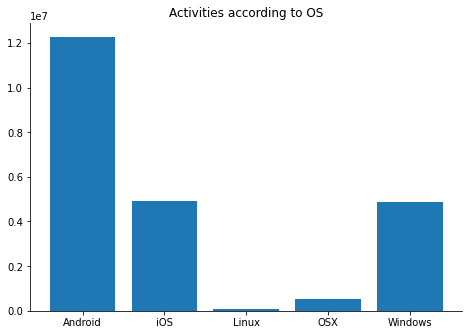

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Android', 'iOS', 'Linux', 'OSX', 'Windows']
ax.bar(labels, os_count)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.title('Activities according to OS')
plt.show()

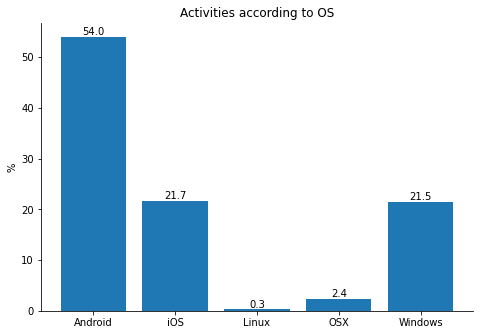

In [ ]:
os_count_perc = [x / len(df_os)*100 for x in os_count]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Android', 'iOS', 'Linux', 'OSX', 'Windows']
ax.bar(labels, os_count_perc)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
for c in ax.containers:
  ax.bar_label(c, fmt='%.1f', label_type='edge')
plt.title('Activities according to OS')
plt.ylabel('%')
plt.show()

Notiamo un'assoluta predominanza di Android e, più in generale, degli OS per telefono.

## Analisi device

Vediamo i device più utilizzati.

In [ ]:
df_dev = df[["device_type"]]

In [ ]:
dev_count = []
for i in range(1, 4):
  dev_count.append(df_dev['device_type'].value_counts()[i])
dev_count.append(df_dev['device_type'].value_counts()[5])

In [ ]:
dev_count

[17219135, 5499030, 15754, 50]

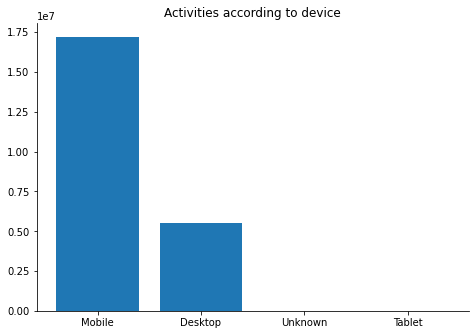

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Mobile', 'Desktop', 'Unknown', 'Tablet']
ax.bar(labels, dev_count)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.title('Activities according to device')
plt.show()

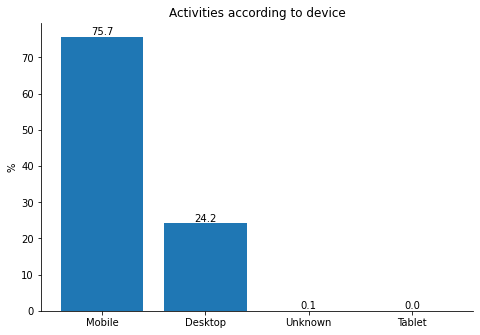

In [ ]:
dev_count_perc = [x / len(df_dev)*100 for x in dev_count]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Mobile', 'Desktop', 'Unknown', 'Tablet']
ax.bar(labels, dev_count_perc)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
for c in ax.containers:
  ax.bar_label(c, fmt='%.1f', label_type='edge')
plt.title('Activities according to device')
plt.ylabel('%')
plt.show()

La maggioranza degli utenti utilizza dispositivi Mobile. Praticamente nulle le categorie Unknown e Tablet.

## Analisi orari

Vediamo ora gli orari degli utenti.

In [ ]:
df_time = df[["time1_workday_morning", "time1_workday_afternoon", "time1_workday_evening", "time1_workday_night", 
              "time1_weekend_morning", "time1_weekend_afternoon", "time1_weekend_evening", "time1_weekend_night"]]

In [ ]:
time_count = []
for column in df_time.columns:
  time_count.append(sum(df_time[column]))

In [ ]:
time_count

[427238157.32760704,
 705121072.5695498,
 418331438.61556035,
 152078533.98669076,
 187721626.85000673,
 263235593.876108,
 147923060.42165148,
 63820201.376331285]

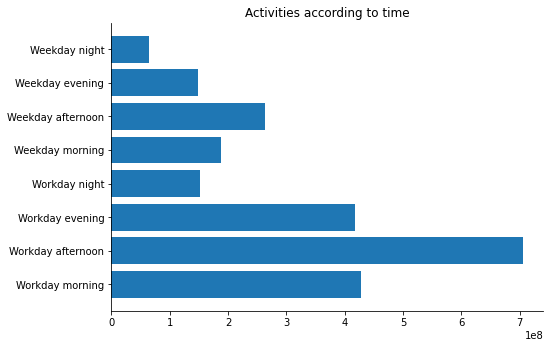

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Workday morning', 'Workday afternoon', 'Workday evening', 'Workday night', 
          'Weekday morning', 'Weekday afternoon', 'Weekday evening', 'Weekday night']
ax.barh(labels, time_count)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.title('Activities according to time')
plt.show()

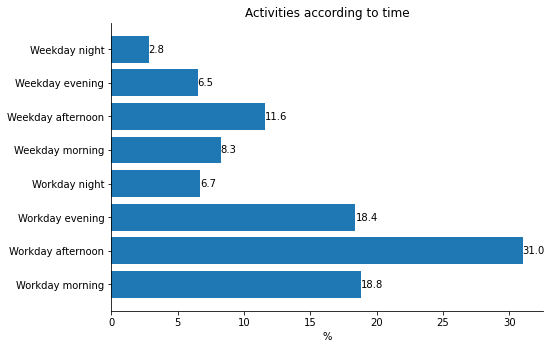

In [ ]:
time_count_perc = [x / len(df_time) for x in time_count]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Workday morning', 'Workday afternoon', 'Workday evening', 'Workday night', 
          'Weekday morning', 'Weekday afternoon', 'Weekday evening', 'Weekday night']
ax.barh(labels, time_count_perc)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
for c in ax.containers:
  ax.bar_label(c, fmt='%.1f', label_type='edge')
plt.title('Activities according to time')
plt.xlabel('%')
plt.show()

La fascia pomeridiana è quella di maggiore attività, mentre quella con minori interazioni è la fascia notturna. 

In [ ]:
week_count = []
week_count.append(sum(time_count[0:4]))
week_count.append(sum(time_count[4:7]))
week_count

[1702769202.4994078, 598880281.1477662]

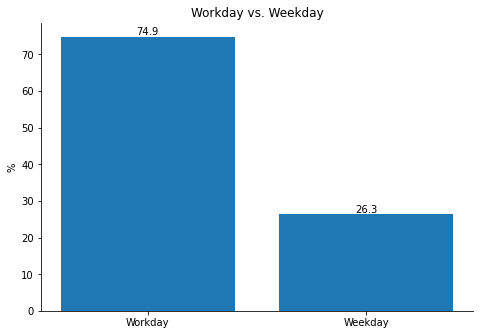

In [ ]:
week_count_perc = [x / len(df_time) for x in week_count]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Workday', 'Weekday']
ax.bar(labels, week_count_perc)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
for c in ax.containers:
  ax.bar_label(c, fmt='%.1f', label_type='edge')
plt.title('Workday vs. Weekday')
plt.ylabel('%')
plt.show()

Notiamo inoltre che durante i giorni di lavoro c'è molta più attività.

## Analisi categorie

In [ ]:
df_cat = df.iloc[:, 14:]

In [ ]:
cat_count = []
for column in df_cat.columns:
  cat_count.append(sum(df_cat[column]))

In [ ]:
cat_count

[98058698.61073942,
 6190583.275066644,
 8652193.452585066,
 3426727.300859029,
 23721683.02382783,
 0.0,
 15921269.629010731,
 16989497.441248387,
 1030792531.7338337,
 125012295.9534962,
 10590150.714880366,
 6214977.743911207,
 753048.4536946461,
 15022040.03526747,
 667240.5162139744,
 2006002.7120780936,
 576998.8137179266,
 5443237.925262749,
 199235952.54936042,
 440508.03157689254,
 37178725.742228866,
 5969389.831756532,
 22493844.698508196,
 51592084.09974068,
 10722410.707256095,
 554917.7949314864]

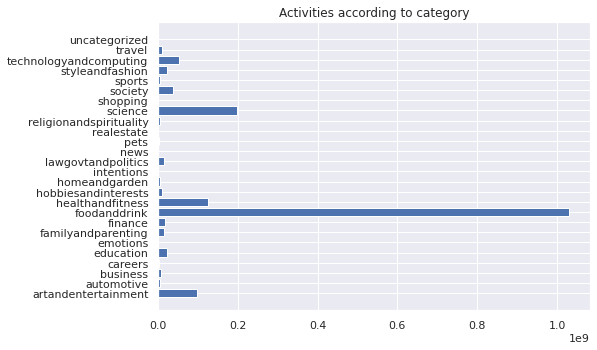

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = df_cat.columns.tolist()
labels = [x.replace('categories1_', '') for x in labels]
ax.barh(labels, cat_count)
plt.title('Activities according to category')
plt.show()

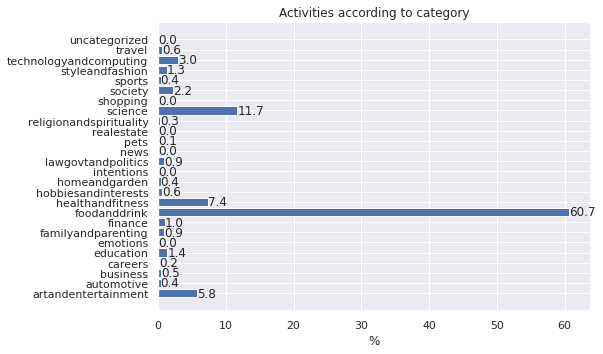

In [ ]:
cat_count_perc = [(np.around(x / sum(cat_count), 3) * 100) for x in cat_count]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = df_cat.columns.tolist()
labels = [x.replace('categories1_', '') for x in labels]
ax.barh(labels, cat_count_perc)
for c in ax.containers:
  ax.bar_label(c, fmt = '%.1f', label_type = 'edge')
plt.title('Activities according to category')
plt.xlabel('%')
plt.show()

La categoria con frequenza maggiore è senza dubbio quella relativa a cibo e bevande. Inoltre, la colonna relativa alla categoria emotions è tutta uguale a 0, perciò rimuoviamola. 

In [ ]:
df.drop('categories1_emotions', axis = 1, inplace = True)

Rimuoviamo inoltre la colonna uncategorized e i device unknown e tablet, che non ci serviranno nel proseguio dell'analisi.

In [ ]:
df.drop('categories1_uncategorized', axis = 1, inplace = True)
df = df[(df.device_type != 3) & (df.device_type != 5)]
df.reset_index(inplace = True, drop = True)

In [ ]:
df

,os_android,os_ios,os_linux,os_osx,os_windows,device_type,time1_workday_morning,time1_workday_afternoon,time1_workday_evening,time1_workday_night,...,categories1_pets,categories1_realestate,categories1_religionandspirituality,categories1_science,categories1_shopping,categories1_society,categories1_sports,categories1_styleandfashion,categories1_technologyandcomputing,categories1_travel
0,1,0,0,0,0,1,100.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1,1,0,0,0,0,1,0.000000,75.000000,0.000000,12.5,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2,0,0,0,0,1,2,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3,0,0,0,0,1,2,0.000000,3.571429,28.571429,0.0,...,0.0,0.0,0.0,0.600000,0.0,0.000000,0.0,0.000000,2.160000,0.000000
4,1,0,0,0,0,1,0.000000,100.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22718160,1,0,0,0,0,1,0.000000,0.000000,100.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
22718161,1,0,0,0,0,1,50.000000,50.000000,0.000000,0.0,...,0.0,0.0,0.0,32.500000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
22718162,1,0,0,0,0,1,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,40.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
22718163,0,1,0,0,0,1,88.888889,0.000000,0.000000,0.0,...,0.0,0.0,0.0,9.444444,0.0,11.555556,0.0,6.111111,1.444444,4.111111


## Alcune osservazioni

Consideriamo il dataset ottenuto alla fine dell'ultima sezione.

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/DSLab/dataset.csv')
df.drop('Unnamed: 0.1', axis = 1, inplace = True)
df.drop('Unnamed: 0.2', axis = 1, inplace = True)
df.drop('Unnamed: 0', axis = 1, inplace = True)
df = df.replace(np.inf, np.nan)
df.dropna(inplace = True)
df.reset_index(inplace = True, drop = True)
df.drop('os_bsd', axis = 1, inplace = True)
df.drop('os_other', axis = 1, inplace = True)
df.drop('categories1_emotions', axis = 1, inplace = True)
df.drop('categories1_uncategorized', axis = 1, inplace = True)
df = df[(df.device_type != 3) & (df.device_type != 5)]
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.reset_index(inplace = True, drop = True)

Risalviamo il dataset.

In [ ]:
df.to_csv('/content/gdrive/MyDrive/DSLab/final_dataset.csv')

Vediamo ora gli orari di maggiore attività in riferimento ai diversi device e OS utilizzati.

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/DSLab/final_dataset.csv')

In [ ]:
df_mob = df[df.device_type == 1]
df_pc = df[df.device_type == 2]
df_time = df[["time1_workday_morning", "time1_workday_afternoon", "time1_workday_evening", "time1_workday_night", 
              "time1_weekend_morning", "time1_weekend_afternoon", "time1_weekend_evening", "time1_weekend_night"]]
df_mob = df_mob[["time1_workday_morning", "time1_workday_afternoon", "time1_workday_evening", "time1_workday_night", 
                 "time1_weekend_morning", "time1_weekend_afternoon", "time1_weekend_evening", "time1_weekend_night"]]
df_pc = df_pc[["time1_workday_morning", "time1_workday_afternoon", "time1_workday_evening", "time1_workday_night", 
               "time1_weekend_morning", "time1_weekend_afternoon", "time1_weekend_evening", "time1_weekend_night"]]

In [ ]:
time_mob_perc = []
time_pc_perc = []
total_time_mob = 0
total_time_pc = 0
for column in df_time.columns:  
  total_time_mob += sum(df_mob[column])
  total_time_pc += sum(df_pc[column])
for column in df_time.columns:  
  time_mob_perc.append(np.around((sum(df_mob[column])/total_time_mob)*100,2))
  time_pc_perc.append(np.around((sum(df_pc[column])/total_time_pc)*100,2))

In [ ]:
time_mob_perc

[15.68, 27.88, 19.51, 6.99, 8.3, 11.62, 6.94, 3.07]

In [ ]:
time_pc_perc

[25.51, 35.84, 11.99, 4.63, 6.82, 9.61, 4.1, 1.51]

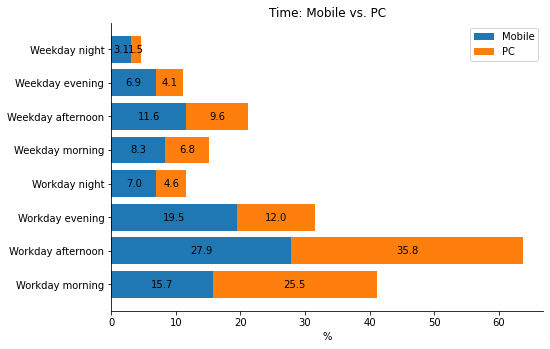

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Workday morning', 'Workday afternoon', 'Workday evening', 'Workday night', 
          'Weekday morning', 'Weekday afternoon', 'Weekday evening', 'Weekday night']
ax.barh(labels, time_mob_perc, label='Mobile')
ax.barh(labels, time_pc_perc, left=time_mob_perc, label='PC')
for c in ax.containers:
  ax.bar_label(c, fmt='%.1f', label_type='center')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.title('Time: Mobile vs. PC')
plt.xlabel('%')
plt.legend()
plt.show()

Gli utenti PC sono generalmente più attivi durante le ore di lavoro (workday afternoon e workday morning), come era lecito aspettarsi.

Vediamo ora se, all'interno della categoria Mobile, sussistano sostanziali differenze tra utenti iOS e utenti Android.

In [ ]:
df_mob = df[df.device_type == 1]
df_ios = df_mob[df_mob.os_ios == 1]
df_android = df_mob[df_mob.os_android == 1]
df_time = df[["time1_workday_morning", "time1_workday_afternoon", "time1_workday_evening", "time1_workday_night", 
              "time1_weekend_morning", "time1_weekend_afternoon", "time1_weekend_evening", "time1_weekend_night"]]
df_ios = df_ios[["time1_workday_morning", "time1_workday_afternoon", "time1_workday_evening", "time1_workday_night", 
                 "time1_weekend_morning", "time1_weekend_afternoon", "time1_weekend_evening", "time1_weekend_night"]]
df_android = df_android[["time1_workday_morning", "time1_workday_afternoon", "time1_workday_evening", "time1_workday_night", 
                         "time1_weekend_morning", "time1_weekend_afternoon", "time1_weekend_evening", "time1_weekend_night"]]

In [ ]:
time_ios_perc = []
time_android_perc = []
total_time_ios = 0
total_time_android = 0
for column in df_time.columns:  
  total_time_ios += sum(df_ios[column])
  total_time_android += sum(df_android[column])
for column in df_time.columns:  
  time_ios_perc.append(np.around((sum(df_ios[column])/total_time_ios)*100,2))
  time_android_perc.append(np.around((sum(df_android[column])/total_time_android)*100,2))

In [ ]:
time_ios_perc

[16.22, 27.93, 19.61, 6.9, 8.5, 11.43, 6.63, 2.77]

In [ ]:
time_android_perc

[15.45, 27.87, 19.47, 7.03, 8.21, 11.69, 7.07, 3.2]

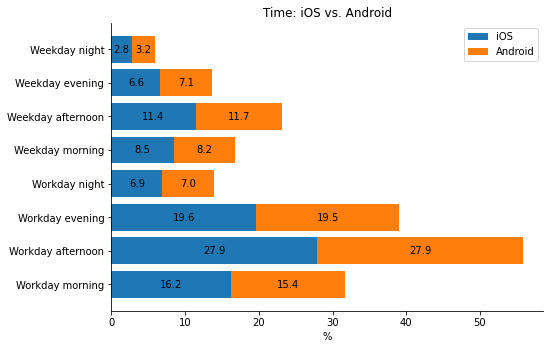

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Workday morning', 'Workday afternoon', 'Workday evening', 'Workday night', 
          'Weekday morning', 'Weekday afternoon', 'Weekday evening', 'Weekday night']
ax.barh(labels, time_ios_perc, label='iOS')
ax.barh(labels, time_android_perc, left=time_ios_perc, label='Android')
for c in ax.containers:
  ax.bar_label(c, fmt='%.1f', label_type='center')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.title('Time: iOS vs. Android')
plt.xlabel('%')
plt.legend()
plt.show()

Le differenze tra i due tipi di utenti non sono molto sostanziali. Notiamo tuttavia alcune variazioni:

*   Utenti Android più attivi durante la sera e durante la notte nel weekend (10.3% vs. 9.4%).
*   Utenti iOS più attivi durante la mattina (24.7% vs. 23.6%).
*   Utenti Android più attivi durante il weekend (30.2% vs. 29.3%) 
*   Utenti Android più attivi durante la notte (10.2% vs. 9.7%).

# Cluster analysis

Eseguiamo ora un'analisi più profonda. Applichiamo l'algoritmo K-Means al dataset ottenuto tramite PCA, confrontando i risultati e valutando la bontà dei raggruppamenti.

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/DSLab/final_dataset.csv')
# Intentions ha solo valori pari a 0
df.drop('categories1_intentions', axis = 1, inplace = True)

Effettuiamo un'altra selezione: prendiamo esclusivamente le righe la cui somma degli interessi delle categorie arrivi almeno al 90% (quindi uncategorized < 10%).

In [ ]:
df['new'] = (df.iloc[:, 15:]).apply(lambda row: sum(row) < 90, axis = 1)
df.drop(df[df.new == True].index, inplace = True)
df.drop('new', axis = 1, inplace = True)
df.reset_index(drop = True, inplace = True)

In [ ]:
df.to_csv('/content/gdrive/MyDrive/DSLab/final_dataset_90.csv')  

In [2]:
df = pd.read_csv('/content/gdrive/MyDrive/DSLab/final_dataset_90.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df_cat = df.iloc[:, 15:]

## PCA (2)

Applichiamo ora la PCA per ridurre la dimensione del dataset.

In [ ]:
pca = PCA()
df_pca = pca.fit_transform(df_cat)
pca.explained_variance_ratio_

array([6.21538622e-01, 1.06465445e-01, 6.71931377e-02, 4.31998381e-02,
       3.52745178e-02, 2.71336146e-02, 2.34245703e-02, 2.23597859e-02,
       1.19579819e-02, 9.01595385e-03, 8.41315544e-03, 6.21968088e-03,
       4.27647478e-03, 2.94930725e-03, 2.07929153e-03, 1.65717161e-03,
       1.49688895e-03, 1.39847545e-03, 1.26709360e-03, 1.04712702e-03,
       6.83913689e-04, 5.81928800e-04, 3.66023630e-04])

Le prime 2 componenti spiegano il 73% della variabilità delle osservazioni, mentre le prime 6 raggiungono il 90%. Proviamo intanto con 2 componenti per visualizzare graficamente i cluster.

In [5]:
pca = PCA(n_components = 2)
df_pca = pca.fit_transform(df_cat)
pca.explained_variance_ratio_

array([0.62153862, 0.10646545])

In [ ]:
pca.components_

array([[ 4.93170523e-02,  2.75004696e-03,  2.29552145e-03,
         5.64635107e-02,  2.12394493e-01,  3.12468448e-03,
         1.93226340e-01, -9.44364889e-01,  1.95738065e-02,
         3.60894947e-03,  3.12639437e-03,  7.90783138e-03,
         8.84965376e-03,  3.18056440e-03,  2.90193965e-03,
         7.69225698e-02,  5.26733967e-02,  2.29496694e-03,
         3.27980011e-02,  3.58120365e-02,  2.02058259e-02,
         8.86763122e-02,  1.38597177e-02],
       [-1.57025920e-02, -9.18681730e-04, -1.93353831e-03,
        -2.62601257e-02,  8.13569435e-01, -1.05347944e-03,
        -5.62526857e-01,  4.80365622e-02, -4.79063749e-03,
        -1.01942727e-03, -1.18958711e-03, -4.62016278e-03,
        -3.01217990e-03, -1.06750835e-03, -1.59806668e-03,
        -3.91197040e-02, -1.46390465e-02, -7.38133891e-04,
        -1.94298365e-02, -1.32255923e-02, -6.84074520e-03,
        -1.26498232e-01, -3.63199498e-03]])

Nella prima componente le variabili originali che influenzano di più (consideriamo soglia |0.07|) sono:

*   4 (education) - positivamente (0.21).
*   6 (finance) - positivamente (0.19).
*   7 (foodanddrink) - negativamente (-0.94).
*   15 (religion) - positivamente (0.08).
*   21 (technologyandcomputing) - positivamente (0.09).

In particolare, foodanddrink influenza in maniera molto più netta delle altre.
Nella seconda componente le variabili originali che influenzano di più sono:

*   4 (education) - positivamente (0.81).
*   6 (finance) - negativamente (-0.56).
*   21 (technologyandcomputing) - negativamente (0.13).

## K-Means (4)

In [ ]:
df_pca = pd.DataFrame(df_pca, index = df_cat.index)

Text(0, 0.5, 'WCSS')

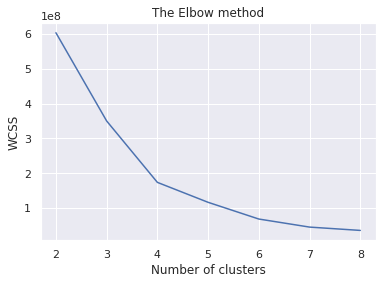

In [ ]:
wcss = []
for i in range(2, 9):
    kmeans = KMeans(i)
    kmeans.fit(df_pca)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(2, 9)
plt.plot(number_clusters, wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

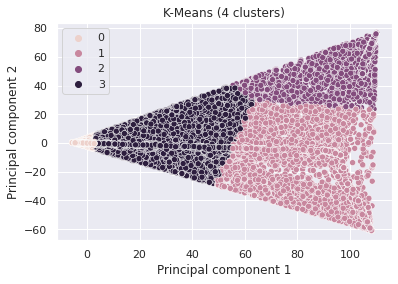

In [ ]:
kmeans = KMeans(4)
identified_clusters = kmeans.fit_predict(df_pca)
df_pca.columns = ['Principal component 1', 'Principal component 2']
sns.scatterplot(data = df_pca, x = 'Principal component 1', y = 'Principal component 2', hue = kmeans.labels_)
plt.title("K-Means (4 clusters)")
plt.savefig('K-Means (4).png', dpi = 300)
plt.show()

## Descrizione dei cluster

Valutiamo anzitutto le componenti che costituiscono i centroidi dei cluster.

In [ ]:
kmeans.cluster_centers_

array([[-3.60482705e+00,  9.11047356e-02],
       [ 9.57857199e+01, -2.26689032e+01],
       [ 1.07810089e+02,  7.11738566e+01],
       [ 1.00929160e+01, -5.72937210e-01]])

Descrizione dei centroidi:

0.   (-3.60, 0.09). 
1.   (95.79, -22.67).
2.   (107.81, 71.12).
3.   (10.09, -0.57).

Vediamo ora le differenze tra i vari cluster in termini di time, device e OS.

In [ ]:
df['Principal component 1'] = df_pca['Principal component 1']
df['Principal component 2'] = df_pca['Principal component 2']
df['Cluster'] = identified_clusters

In [ ]:
for i in range(4):
  print(np.around((df['Cluster'].value_counts()[i])/len(df), 4)*100)

13.01
1.39
0.43
85.17


In [ ]:
df_0 = df[df['Cluster'] == 0]
df_0.describe()

In [ ]:
df_1 = df[df['Cluster'] == 1]
df_1.describe()

In [ ]:
df_2 = df[df['Cluster'] == 2]
df_2.describe()

In [ ]:
df_3 = df[df['Cluster'] == 3]
df_3.describe()

In [ ]:
plt.rcParams["figure.figsize"] = (12, 7)

### OS

In [ ]:
df_os = df[["os_android", "os_ios", "os_linux", "os_osx", "os_windows", "Cluster"]]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


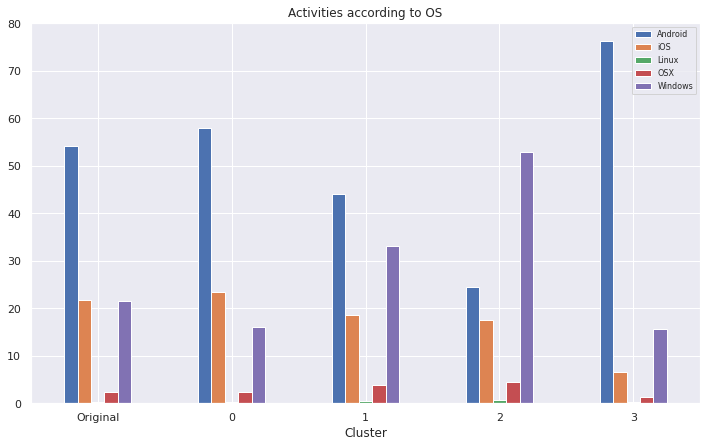

In [ ]:
df_0_os = df_os[df_os["Cluster"] == 0]
df_0_os.drop("Cluster", axis = 1, inplace = True)
df_1_os = df_os[df_os["Cluster"] == 1]
df_1_os.drop("Cluster", axis = 1, inplace = True)
df_2_os = df_os[df_os["Cluster"] == 2]
df_2_os.drop("Cluster", axis = 1, inplace = True)
df_3_os = df_os[df_os["Cluster"] == 3]
df_3_os.drop("Cluster", axis = 1, inplace = True)
os_0_count = [0] * 5
os_1_count = [0] * 5
os_2_count = [0] * 5
os_3_count = [0] * 5

i = 0
for column in df_0_os.columns:
  os_0_count[i] = df_0_os[column].value_counts()[1]
  os_1_count[i] = df_1_os[column].value_counts()[1]
  os_2_count[i] = df_2_os[column].value_counts()[1]
  os_3_count[i] = df_3_os[column].value_counts()[1]
  i += 1

data = [["Original", 12285577.0, 4931163.0, 72503.0, 542380.0, 4880349.0],
        ["0", os_0_count[0], os_0_count[1], os_0_count[2], os_0_count[3], os_0_count[4]],
        ["1", os_1_count[0], os_1_count[1], os_1_count[2], os_1_count[3], os_1_count[4]],
        ["2", os_2_count[0], os_2_count[1], os_2_count[2], os_2_count[3], os_2_count[4]],
        ["3", os_3_count[0], os_3_count[1], os_3_count[2], os_3_count[3], os_3_count[4]]]
df_os = pd.DataFrame(data, columns = ["Cluster", "Android", "iOS", "Linux", "OSX", "Windows"])
data = df_os.copy()

column_set = df_os.columns.drop("Cluster")
for column in column_set:
  for i in range(5):
    data[column][i] = np.around(((df_os[column][i]/(df_os.iloc[i, 1:].sum())) * 100), 2)

data.plot(x = "Cluster", y = ["Android", "iOS", "Linux", "OSX", "Windows"], kind = "bar")
plt.title('Activities according to OS')
plt.xticks(rotation = 0)
plt.legend(loc = 'upper right', prop = {'size': 8})
plt.savefig('OS - 4 cluster - 2 PCA.png', dpi = 300)
plt.show()

In [ ]:
data

,Cluster,Android,iOS,Linux,OSX,Windows
0,Original,54.09,21.71,0.32,2.39,21.49
1,0,57.98,23.41,0.23,2.32,16.06
2,1,43.98,18.48,0.52,3.81,33.21
3,2,24.58,17.52,0.60,4.45,52.85
4,3,76.27,6.55,0.21,1.26,15.71


### Device

In [ ]:
df_dev = df[["device_type", "Cluster"]]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


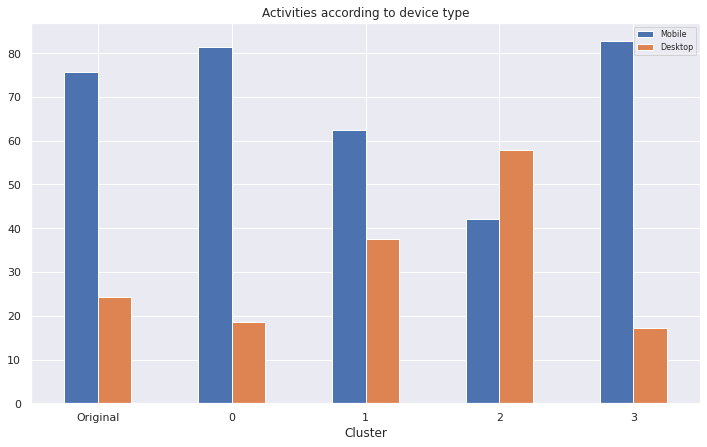

In [ ]:
df_0_dev = df_dev[df_dev["Cluster"] == 0]
df_0_dev.drop("Cluster", axis = 1, inplace = True)
df_1_dev = df_dev[df_dev["Cluster"] == 1]
df_1_dev.drop("Cluster", axis = 1, inplace = True)
df_2_dev = df_dev[df_dev["Cluster"] == 2]
df_2_dev.drop("Cluster", axis = 1, inplace = True)
df_3_dev = df_dev[df_dev["Cluster"] == 3]
df_3_dev.drop("Cluster", axis = 1, inplace = True)
dev_0_count = [0] * 2
dev_1_count = [0] * 2
dev_2_count = [0] * 2
dev_3_count = [0] * 2

for i in range(2):
  dev_0_count[i] = df_0_dev['device_type'].value_counts()[i+1]
  dev_1_count[i] = df_1_dev['device_type'].value_counts()[i+1]
  dev_2_count[i] = df_2_dev['device_type'].value_counts()[i+1]
  dev_3_count[i] = df_3_dev['device_type'].value_counts()[i+1]

data = [["Original", 17219135.0, 5499030.0],
        ["0", dev_0_count[0], dev_0_count[1]], 
        ["1", dev_1_count[0], dev_1_count[1]], 
        ["2", dev_2_count[0], dev_2_count[1]],
        ["3", dev_3_count[0], dev_3_count[1]]]
df_dev = pd.DataFrame(data, columns = ["Cluster", "Mobile", "Desktop"])
data = df_dev.copy()

column_set = df_dev.columns.drop("Cluster")
for column in column_set:
  for i in range(5):
    data[column][i] = np.around(((df_dev[column][i]/(df_dev.iloc[i, 1:].sum())) * 100), 2)

data.plot(x = "Cluster", y = ["Mobile", "Desktop"], kind = "bar")
plt.title('Activities according to device type')
plt.xticks(rotation = 0)
plt.legend(loc = 'upper right', prop = {'size': 8})
plt.savefig('Device - 4 cluster - 2 PCA.png', dpi = 300)
plt.show()

In [ ]:
data

,Cluster,Mobile,Desktop
0,Original,75.79,24.21
1,0,81.38,18.62
2,1,62.45,37.55
3,2,42.07,57.93
4,3,82.81,17.19


### Time

In [ ]:
df_time = df[["time1_workday_morning", "time1_workday_afternoon", "time1_workday_evening", "time1_workday_night", 
              "time1_weekend_morning", "time1_weekend_afternoon", "time1_weekend_evening", "time1_weekend_night", "Cluster"]]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


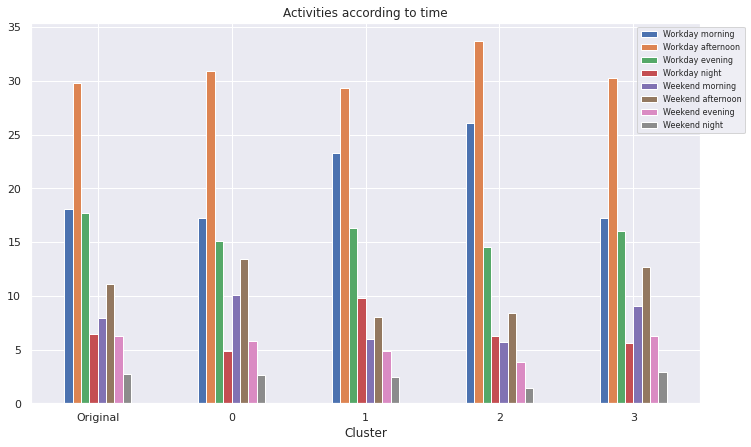

In [ ]:
df_0_time = df_time[df_time["Cluster"] == 0]
df_0_time.drop("Cluster", axis = 1, inplace = True)
df_1_time = df_time[df_time["Cluster"] == 1]
df_1_time.drop("Cluster", axis = 1, inplace = True)
df_2_time = df_time[df_time["Cluster"] == 2]
df_2_time.drop("Cluster", axis = 1, inplace = True)
df_3_time = df_time[df_time["Cluster"] == 3]
df_3_time.drop("Cluster", axis = 1, inplace = True)
time_0_count = [0] * 8
time_1_count = [0] * 8
time_2_count = [0] * 8
time_3_count = [0] * 8

i = 0
for column in df_0_time.columns:
  time_0_count[i] = df_0_time[column].sum()
  time_1_count[i] = df_1_time[column].sum()
  time_2_count[i] = df_2_time[column].sum()
  time_3_count[i] = df_3_time[column].sum()
  i += 1

data = [["Original", 427238157.32760704, 705121072.5695498, 418331438.61556035, 152078533.98669076, 187721626.85000673, 263235593.876108, 147923060.42165148, 63820201.376331285],
        ["0", time_0_count[0], time_0_count[1], time_0_count[2], time_0_count[3], time_0_count[4], time_0_count[5], time_0_count[6], time_0_count[7]],
        ["1", time_1_count[0], time_1_count[1], time_1_count[2], time_1_count[3], time_1_count[4], time_1_count[5], time_1_count[6], time_1_count[7]],
        ["2", time_2_count[0], time_2_count[1], time_2_count[2], time_2_count[3], time_2_count[4], time_2_count[5], time_2_count[6], time_2_count[7]],
        ["3", time_3_count[0], time_3_count[1], time_3_count[2], time_3_count[3], time_3_count[4], time_3_count[5], time_3_count[6], time_3_count[7]]]
df_time = pd.DataFrame(data, columns = ["Cluster", "Workday morning", "Workday afternoon", "Workday evening", "Workday night", 
                                       "Weekend morning", "Weekend afternoon", "Weekend evening", "Weekend night"])
data = df_time.copy()

column_set = df_time.columns.drop("Cluster")
for column in column_set:
  for i in range(5):
    data[column][i] = np.around(((df_time[column][i]/(df_time.iloc[i, 1:].sum())) * 100), 2)

data.plot(x = "Cluster", y = ["Workday morning", "Workday afternoon", "Workday evening", "Workday night", 
                              "Weekend morning", "Weekend afternoon", "Weekend evening", "Weekend night"], kind = "bar")
plt.title('Activities according to time')
plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor = (0.9, 1), prop = {'size': 8})
plt.savefig('Time - 4 cluster - 2 PCA.png', dpi = 300)
plt.show()

In [ ]:
data

,Cluster,Workday morning,Workday afternoon,Workday evening,Workday night,Weekend morning,Weekend afternoon,Weekend evening,Weekend night
0,Original,18.06,29.81,17.68,6.43,7.94,11.13,6.25,2.70
1,0,17.19,30.93,15.08,4.88,10.03,13.42,5.81,2.65
2,1,23.29,29.37,16.26,9.84,5.97,8.02,4.82,2.44
3,2,26.05,33.71,14.57,6.26,5.73,8.40,3.87,1.41
4,3,17.19,30.30,16.03,5.57,9.07,12.67,6.23,2.94


## K-Means (3)

In [6]:
df_pca = pd.DataFrame(df_pca, index = df_cat.index)

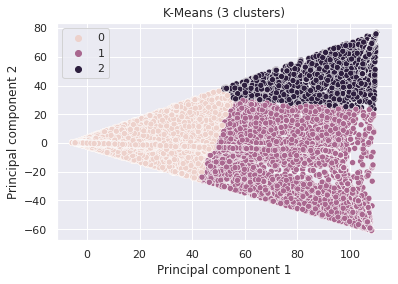

In [ ]:
kmeans = KMeans(3)
identified_clusters = kmeans.fit_predict(df_pca)
df_pca.columns = ['Principal component 1', 'Principal component 2']
sns.scatterplot(data = df_pca, x = 'Principal component 1', y = 'Principal component 2', hue = kmeans.labels_)
plt.title("K-Means (3 clusters)")
plt.savefig('K-Means (3).png', dpi = 300)
plt.show()

## Descrizione dei cluster

Valutiamo anzitutto le componenti che costituiscono i centroidi dei cluster.

In [ ]:
kmeans.cluster_centers_

array([[-1.86142457e+00,  4.02517137e-03],
       [ 9.41915153e+01, -2.19849367e+01],
       [ 1.06873086e+02,  7.05902537e+01]])

Descrizione dei centroidi:

0.   (-1.86, 0.004). 
1.   (94.19, -21.98).
2.   (106.87, 70.59).

Vediamo ora le differenze tra i vari cluster in termini di time, device e OS.

In [8]:
df['Principal component 1'] = df_pca['Principal component 1']
df['Principal component 2'] = df_pca['Principal component 2']
df['Cluster'] = identified_clusters

In [ ]:
for i in range(3):
  print(np.around((df['Cluster'].value_counts()[i])/len(df), 4)*100)

98.11999999999999
1.44
0.44


In [ ]:
df_0 = df[df['Cluster'] == 0]
df_0.describe()

In [ ]:
df_1 = df[df['Cluster'] == 1]
df_1.describe()

In [ ]:
df_2 = df[df['Cluster'] == 2]
df_2.describe()

In [9]:
plt.rcParams["figure.figsize"] = (12, 7)

### OS

In [10]:
df_os = df[["os_android", "os_ios", "os_linux", "os_osx", "os_windows", "Cluster"]]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


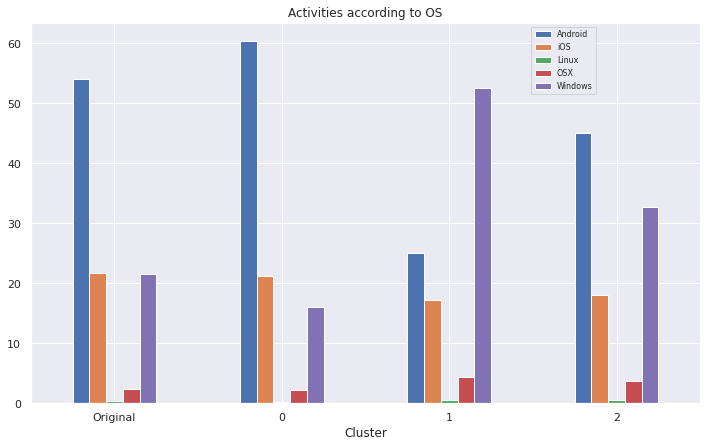

In [11]:
df_0_os = df_os[df_os["Cluster"] == 0]
df_0_os.drop("Cluster", axis = 1, inplace = True)
df_1_os = df_os[df_os["Cluster"] == 1]
df_1_os.drop("Cluster", axis = 1, inplace = True)
df_2_os = df_os[df_os["Cluster"] == 2]
df_2_os.drop("Cluster", axis = 1, inplace = True)
os_0_count = [0] * 5
os_1_count = [0] * 5
os_2_count = [0] * 5

i = 0
for column in df_0_os.columns:
  os_0_count[i] = df_0_os[column].value_counts()[1]
  os_1_count[i] = df_1_os[column].value_counts()[1]
  os_2_count[i] = df_2_os[column].value_counts()[1]
  i += 1

data = [["Original", 12285577.0, 4931163.0, 72503.0, 542380.0, 4880349.0],
        ["0", os_0_count[0], os_0_count[1], os_0_count[2], os_0_count[3], os_0_count[4]],
        ["1", os_1_count[0], os_1_count[1], os_1_count[2], os_1_count[3], os_1_count[4]],
        ["2", os_2_count[0], os_2_count[1], os_2_count[2], os_2_count[3], os_2_count[4]]]
df_os = pd.DataFrame(data, columns = ["Cluster", "Android", "iOS", "Linux", "OSX", "Windows"])
data = df_os.copy()

column_set = df_os.columns.drop("Cluster")
for column in column_set:
  for i in range(4):
    data[column][i] = np.around(((df_os[column][i]/(df_os.iloc[i, 1:].sum())) * 100), 2)

data.plot(x = "Cluster", y = ["Android", "iOS", "Linux", "OSX", "Windows"], kind = "bar")
plt.title('Activities according to OS')
plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor = (0.85, 1), prop = {'size': 8})
plt.savefig('OS - 3 cluster - 2 PCA.png', dpi = 300)
plt.show()

In [12]:
data

,Cluster,Android,iOS,Linux,OSX,Windows
0,Original,54.09,21.71,0.32,2.39,21.49
1,0,60.41,21.17,0.23,2.18,16.01
2,1,25.07,17.30,0.60,4.42,52.61
3,2,45.00,18.03,0.51,3.73,32.73


### Device

In [13]:
df_dev = df[["device_type", "Cluster"]]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


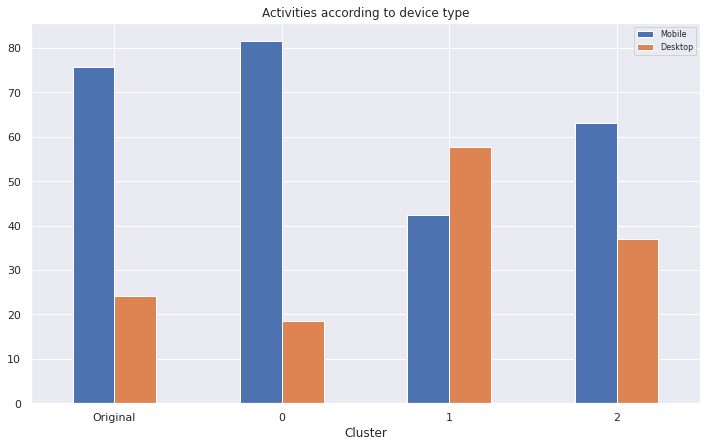

In [14]:
df_0_dev = df_dev[df_dev["Cluster"] == 0]
df_0_dev.drop("Cluster", axis = 1, inplace = True)
df_1_dev = df_dev[df_dev["Cluster"] == 1]
df_1_dev.drop("Cluster", axis = 1, inplace = True)
df_2_dev = df_dev[df_dev["Cluster"] == 2]
df_2_dev.drop("Cluster", axis = 1, inplace = True)
dev_0_count = [0] * 2
dev_1_count = [0] * 2
dev_2_count = [0] * 2

for i in range(2):
  dev_0_count[i] = df_0_dev['device_type'].value_counts()[i+1]
  dev_1_count[i] = df_1_dev['device_type'].value_counts()[i+1]
  dev_2_count[i] = df_2_dev['device_type'].value_counts()[i+1]

data = [["Original", 17219135.0, 5499030.0],
        ["0", dev_0_count[0], dev_0_count[1]], 
        ["1", dev_1_count[0], dev_1_count[1]], 
        ["2", dev_2_count[0], dev_2_count[1]]]
df_dev = pd.DataFrame(data, columns = ["Cluster", "Mobile", "Desktop"])
data = df_dev.copy()

column_set = df_dev.columns.drop("Cluster")
for column in column_set:
  for i in range(4):
    data[column][i] = np.around(((df_dev[column][i]/(df_dev.iloc[i, 1:].sum())) * 100), 2)

data.plot(x = "Cluster", y = ["Mobile", "Desktop"], kind = "bar")
plt.title('Activities according to device type')
plt.xticks(rotation = 0)
plt.legend(loc = 'upper right', prop = {'size': 8})
plt.savefig('Device - 3 cluster - 2 PCA.png', dpi = 300)
plt.show()

In [15]:
data

,Cluster,Mobile,Desktop
0,Original,75.79,24.21
1,0,81.57,18.43
2,1,42.34,57.66
3,2,63.02,36.98


### Time

In [16]:
df_time = df[["time1_workday_morning", "time1_workday_afternoon", "time1_workday_evening", "time1_workday_night", 
              "time1_weekend_morning", "time1_weekend_afternoon", "time1_weekend_evening", "time1_weekend_night", "Cluster"]]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


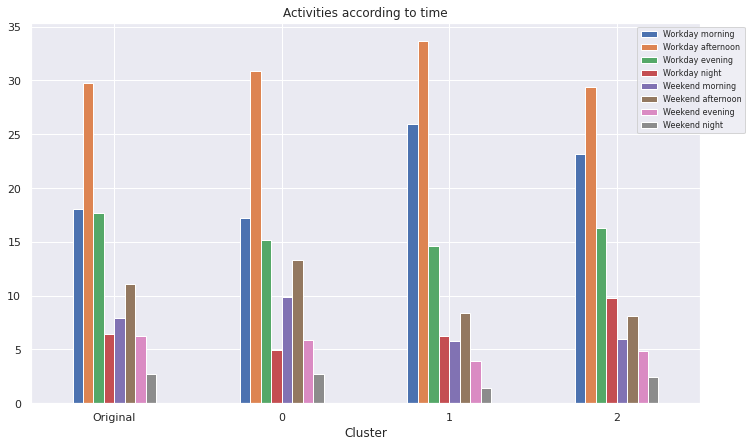

In [17]:
df_0_time = df_time[df_time["Cluster"] == 0]
df_0_time.drop("Cluster", axis = 1, inplace = True)
df_1_time = df_time[df_time["Cluster"] == 1]
df_1_time.drop("Cluster", axis = 1, inplace = True)
df_2_time = df_time[df_time["Cluster"] == 2]
df_2_time.drop("Cluster", axis = 1, inplace = True)
time_0_count = [0] * 8
time_1_count = [0] * 8
time_2_count = [0] * 8

i = 0
for column in df_0_time.columns:
  time_0_count[i] = df_0_time[column].sum()
  time_1_count[i] = df_1_time[column].sum()
  time_2_count[i] = df_2_time[column].sum()
  i += 1

data = [["Original", 427238157.32760704, 705121072.5695498, 418331438.61556035, 152078533.98669076, 187721626.85000673, 263235593.876108, 147923060.42165148, 63820201.376331285],
        ["0", time_0_count[0], time_0_count[1], time_0_count[2], time_0_count[3], time_0_count[4], time_0_count[5], time_0_count[6], time_0_count[7]],
        ["1", time_1_count[0], time_1_count[1], time_1_count[2], time_1_count[3], time_1_count[4], time_1_count[5], time_1_count[6], time_1_count[7]],
        ["2", time_2_count[0], time_2_count[1], time_2_count[2], time_2_count[3], time_2_count[4], time_2_count[5], time_2_count[6], time_2_count[7]]]
df_time = pd.DataFrame(data, columns = ["Cluster", "Workday morning", "Workday afternoon", "Workday evening", "Workday night", 
                                       "Weekend morning", "Weekend afternoon", "Weekend evening", "Weekend night"])
data = df_time.copy()

column_set = df_time.columns.drop("Cluster")
for column in column_set:
  for i in range(4):
    data[column][i] = np.around(((df_time[column][i]/(df_time.iloc[i, 1:].sum())) * 100), 2)

data.plot(x = "Cluster", y = ["Workday morning", "Workday afternoon", "Workday evening", "Workday night", 
                              "Weekend morning", "Weekend afternoon", "Weekend evening", "Weekend night"], kind = "bar")
plt.title('Activities according to time')
plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor = (0.9, 1), prop = {'size': 8})
plt.savefig('Time - 3 cluster - 2 PCA.png', dpi = 300)
plt.show()

In [18]:
data

,Cluster,Workday morning,Workday afternoon,Workday evening,Workday night,Weekend morning,Weekend afternoon,Weekend evening,Weekend night
0,Original,18.06,29.81,17.68,6.43,7.94,11.13,6.25,2.70
1,0,17.19,30.84,15.21,4.97,9.91,13.32,5.87,2.69
2,1,25.92,33.68,14.60,6.23,5.82,8.43,3.89,1.42
3,2,23.13,29.40,16.30,9.75,6.02,8.10,4.86,2.45


## PCA (6)

Applichiamo ora la PCA per ridurre la dimensione del dataset.

In [3]:
pca = PCA(n_components = 6)
df_pca = pca.fit_transform(df_cat)
pca.explained_variance_ratio_

array([0.62153862, 0.10646545, 0.06719314, 0.04319984, 0.03527452,
       0.02713361])

In [ ]:
pca.components_

array([[ 4.93170523e-02,  2.75004696e-03,  2.29552145e-03,
         5.64635107e-02,  2.12394493e-01,  3.12468448e-03,
         1.93226340e-01, -9.44364889e-01,  1.95738065e-02,
         3.60894947e-03,  3.12639437e-03,  7.90783138e-03,
         8.84965376e-03,  3.18056440e-03,  2.90193965e-03,
         7.69225698e-02,  5.26733967e-02,  2.29496694e-03,
         3.27980011e-02,  3.58120365e-02,  2.02058259e-02,
         8.86763122e-02,  1.38597177e-02],
       [-1.57025921e-02, -9.18681776e-04, -1.93353829e-03,
        -2.62601258e-02,  8.13569435e-01, -1.05347944e-03,
        -5.62526857e-01,  4.80365621e-02, -4.79063761e-03,
        -1.01942744e-03, -1.18958702e-03, -4.62016366e-03,
        -3.01218000e-03, -1.06750809e-03, -1.59806493e-03,
        -3.91197041e-02, -1.46390466e-02, -7.38134030e-04,
        -1.94298366e-02, -1.32255923e-02, -6.84074529e-03,
        -1.26498232e-01, -3.63199507e-03],
       [ 1.33933443e-01,  4.89958290e-03,  1.65578658e-03,
         1.28529171e-01, -4.4

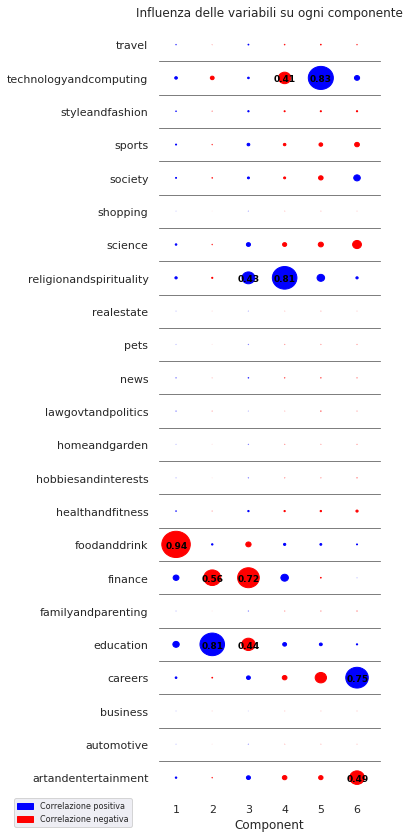

In [ ]:
labels = df_cat.columns.tolist()
labels = [x.replace('categories1_', '') for x in labels]
components = pca.components_

plt.rcParams["figure.figsize"] = (4, 14.2)
fig, ax = plt.subplots() 
ax.set_facecolor('white')
ax.set_xticks([0.6, 1.2, 1.8, 2.4, 3.0, 3.6])
ax.set_yticks([0.6, 1.2, 1.8, 2.4, 3.0, 3.6, 4.2, 4.8, 5.4, 6.0, 6.6, 7.2, 7.8, 8.4,
               9.0, 9.6, 10.2, 10.8, 11.4, 12.0, 12.6, 13.2, 13.8])
ax.set_xlim((0.3, 4))
ax.set_ylim((0.3, 14.2))
ax.set_xticklabels(['1', '2', '3', '4', '5', '6'])
ax.set_yticklabels(labels)
plt.title("Influenza delle variabili su ogni componente")
plt.xlabel("Component")
red_patch = mpatches.Patch(color = 'blue', label = 'Correlazione positiva')
blue_patch = mpatches.Patch(color = 'red', label = 'Correlazione negativa')
plt.legend(bbox_to_anchor = (-0.1, 0.0), handles = [red_patch, blue_patch], prop = {'size': 8})
for x in np.arange(0.3, 14, 0.6):
  ax.axhline(y = x, linewidth = 0.5, color = 'black')
for i in range(23):
  for j in range(6):
    if(components[j][i] >= 0):
      ax.add_patch(plt.Circle((0.6 + 0.6*j, 0.6 + 0.6*i), abs(components[j][i])/4, color = 'blue'))
    else:
      ax.add_patch(plt.Circle((0.6 + 0.6*j, 0.6 + 0.6*i), abs(components[j][i])/4, color = 'red'))
    if(abs(components[j][i]) >= 0.4):
      ax.annotate(np.around(abs(components[j][i]), 2), (0.42 + 0.6*j, 0.535 + 0.6*i), fontsize = 9, color = 'black', fontweight = 'semibold')
   
plt.savefig('PCA - variabili.png', dpi = 300, bbox_inches = "tight")
plt.show()

Consideriamo soglia |0.07|.

Componente 1:

*   4 (education) - positivamente (0.21).
*   6 (finance) - positivamente (0.19).
*   7 (foodanddrink) - negativamente (-0.94).
*   15 (religion) - positivamente (0.08).
*   21 (technologyandcomputing) - positivamente (0.09).

Componente 2:

*   4 (education) - positivamente (0.81).
*   6 (finance) - negativamente (-0.56).
*   21 (technologyandcomputing) - negativamente (0.13).

Componente 3:

*   0 (artandentertainment) - positivamente (0.13).
*   3 (careers) - positivamente (0.13).
*   4 (education) - negativamente (-0.44).
*   6 (finance) - negativamente (-0.72).
*   7 (foodanddrink) - negativamente (-0.18).
*   15 (religion) - positivamente (0.43).
*   16 (science) - positivamente (0.14).
*   18 (society) - positivamente (0.07).
*   19 (sports) - positivamente (0.09).

Componente 4:

*   0 (artandentertainment) - negativamente (-0.15).
*   3 (careers) - negativamente (-0.16).
*   4 (education) - positivamente (0.13).
*   6 (finance) - positivamente (-0.25).
*   7 (foodanddrink) - positivamente (-0.07).
*   15 (religion) - positivamente (0.81).
*   16 (science) - negativamente (-0.14).
*   18 (society) - negativamente (-0.07).
*   19 (sports) - negativamente (-0.09).
*   21 (technologyandcomputing) - negativamente (-0.41).

Componente 5:

*   0 (artandentertainment) - negativamente (-0.15).
*   3 (careers) - negativamente (-0.38).
*   4 (education) - positivamente (0.10).
*   15 (religion) - positivamente (0.25).
*   16 (science) - negativamente (-0.25).
*   18 (society) - negativamente (-0.15).
*   19 (sports) - negativamente (-0.12).
*   21 (technologyandcomputing) - positivamente (0.83).

Componente 6:

*   0 (artandentertainment) - negativamente (-0.49).
*   3 (careers) - positivamente (0.75).
*   8 (healthandfitness) - negativamente (-0.07).
*   15 (religion) - positivamente (0.08).
*   16 (science) - negativamente (-0.29).
*   18 (society) - positivamente (0.22).
*   19 (sports) - negativamente (-0.16).
*   21 (technologyandcomputing) - positivamente (0.17).

## K-Means (5)

In [4]:
df_pca = pd.DataFrame(df_pca, index = df_cat.index)

Text(0, 0.5, 'WCSS')

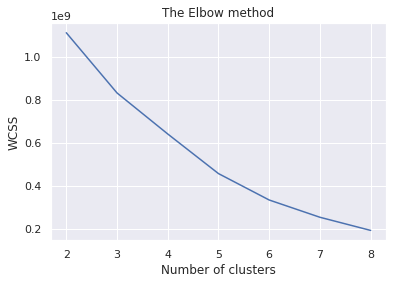

In [ ]:
wcss = []
for i in range(2, 9):
    kmeans = KMeans(i)
    kmeans.fit(df_pca)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(2, 9)
plt.plot(number_clusters, wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [5]:
kmeans = KMeans(5)
identified_clusters = kmeans.fit_predict(df_pca)
df_pca.columns = ['Principal component 1', 'Principal component 2', 'Principal component 3', 'Principal component 4', 'Principal component 5', 'Principal component 6']

## Descrizione dei cluster

Valutiamo anzitutto le componenti che costituiscono i centroidi dei cluster.

In [ ]:
kmeans.cluster_centers_

array([[-3.58545364e+00,  9.01542722e-02, -3.51603110e-01,
         2.05792791e-01,  1.19866653e-01,  1.75684964e-01],
       [ 9.04154937e+01, -7.76380437e+00,  2.87553442e+01,
        -2.33689494e+00, -1.42868618e+00,  3.02956963e+00],
       [ 1.07939550e+02,  7.12755079e+01, -2.47201588e+01,
         4.75982071e+00,  2.62205269e+00,  1.00223074e+00],
       [ 1.04768727e+02, -5.13242192e+01, -3.96709716e+01,
         6.56875261e+00,  4.07744088e+00,  2.60731380e-01],
       [ 1.01551465e+01, -5.81405254e-01,  2.60313447e+00,
        -1.65038896e+00, -9.60440605e-01, -1.47944305e+00]])

Descrizione dei centroidi:

0.   (-3.58, 0.09, -0.35, 0.21, 0.12, 0.18). 
1.   (90.42, -7.76, 28.76, -2.34, -1.43, 3.03).
2.   (107.94, 71.28, -24.72, 4.76, 2.62, 1.00).
3.   (104.77, -51.32, -39.67, 6.57, 4.08, 0.26).
4.   (10.16, -0.58, 2.60, -1.65, -0.96, -1.48).

Vediamo ora le differenze tra i vari cluster in termini di time, device e OS.

In [6]:
df['Principal component 1'] = df_pca['Principal component 1']
df['Principal component 2'] = df_pca['Principal component 2']
df['Principal component 3'] = df_pca['Principal component 3']
df['Principal component 4'] = df_pca['Principal component 4']
df['Principal component 5'] = df_pca['Principal component 5']
df['Principal component 6'] = df_pca['Principal component 6']
df['Cluster'] = identified_clusters

In [ ]:
for i in range(5):
  print(np.around((df['Cluster'].value_counts()[i])/len(df), 4)*100)

85.63
0.9400000000000001
0.43
12.53
0.47000000000000003


In [ ]:
df_0 = df[df['Cluster'] == 0]
df_0.describe()

In [ ]:
df_1 = df[df['Cluster'] == 1]
df_1.describe()

In [ ]:
df_2 = df[df['Cluster'] == 2]
df_2.describe()

In [ ]:
df_3 = df[df['Cluster'] == 3]
df_3.describe()

In [ ]:
df_4 = df[df['Cluster'] == 4]
df_4.describe()

In [7]:
plt.rcParams["figure.figsize"] = (12, 7)

### OS

In [8]:
df_os = df[["os_android", "os_ios", "os_linux", "os_osx", "os_windows", "Cluster"]]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


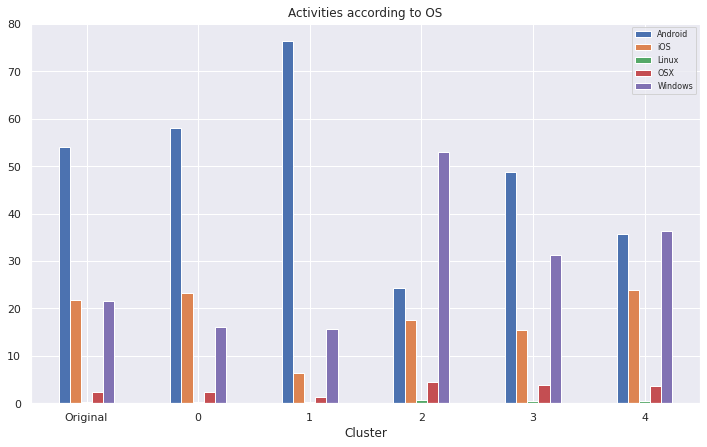

In [9]:
df_0_os = df_os[df_os["Cluster"] == 0]
df_0_os.drop("Cluster", axis = 1, inplace = True)
df_1_os = df_os[df_os["Cluster"] == 1]
df_1_os.drop("Cluster", axis = 1, inplace = True)
df_2_os = df_os[df_os["Cluster"] == 2]
df_2_os.drop("Cluster", axis = 1, inplace = True)
df_3_os = df_os[df_os["Cluster"] == 3]
df_3_os.drop("Cluster", axis = 1, inplace = True)
df_4_os = df_os[df_os["Cluster"] == 4]
df_4_os.drop("Cluster", axis = 1, inplace = True)
os_0_count = [0] * 5
os_1_count = [0] * 5
os_2_count = [0] * 5
os_3_count = [0] * 5
os_4_count = [0] * 5

i = 0
for column in df_0_os.columns:
  os_0_count[i] = df_0_os[column].value_counts()[1]
  os_1_count[i] = df_1_os[column].value_counts()[1]
  os_2_count[i] = df_2_os[column].value_counts()[1]
  os_3_count[i] = df_3_os[column].value_counts()[1]
  os_4_count[i] = df_4_os[column].value_counts()[1]
  i += 1

data = [["Original", 12285577.0, 4931163.0, 72503.0, 542380.0, 4880349.0],
        ["0", os_0_count[0], os_0_count[1], os_0_count[2], os_0_count[3], os_0_count[4]],
        ["1", os_1_count[0], os_1_count[1], os_1_count[2], os_1_count[3], os_1_count[4]],
        ["2", os_2_count[0], os_2_count[1], os_2_count[2], os_2_count[3], os_2_count[4]],
        ["3", os_3_count[0], os_3_count[1], os_3_count[2], os_3_count[3], os_3_count[4]],
        ["4", os_4_count[0], os_4_count[1], os_4_count[2], os_4_count[3], os_4_count[4]]]
df_os = pd.DataFrame(data, columns = ["Cluster", "Android", "iOS", "Linux", "OSX", "Windows"])
data = df_os.copy()

column_set = df_os.columns.drop("Cluster")
for column in column_set:
  for i in range(6):
    data[column][i] = np.around(((df_os[column][i]/(df_os.iloc[i, 1:].sum())) * 100), 2)

data.plot(x = "Cluster", y = ["Android", "iOS", "Linux", "OSX", "Windows"], kind = "bar")
plt.title('Activities according to OS')
plt.xticks(rotation = 0)
plt.legend(loc = 'upper right', prop = {'size': 8})
plt.savefig('OS - 5 cluster - 6 PCA.png', dpi = 300)
plt.show()

In [10]:
data

,Cluster,Android,iOS,Linux,OSX,Windows
0,Original,54.09,21.71,0.32,2.39,21.49
1,0,58.07,23.33,0.23,2.31,16.05
2,1,76.41,6.39,0.21,1.25,15.73
3,2,24.38,17.57,0.61,4.42,53.02
4,3,48.81,15.51,0.52,3.87,31.28
5,4,35.71,23.89,0.50,3.62,36.27


### Device

In [11]:
df_dev = df[["device_type", "Cluster"]]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


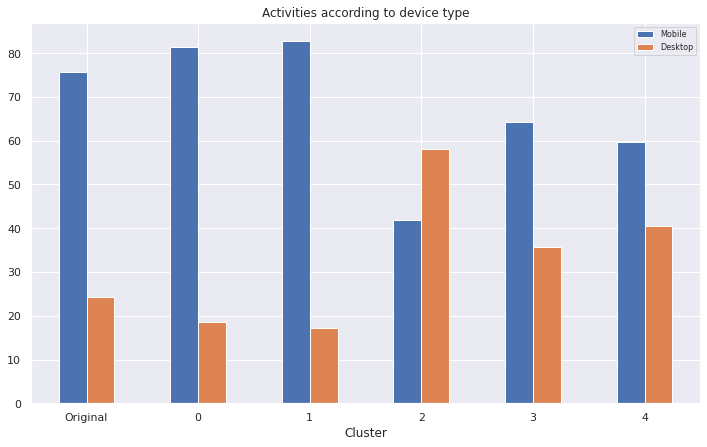

In [12]:
df_0_dev = df_dev[df_dev["Cluster"] == 0]
df_0_dev.drop("Cluster", axis = 1, inplace = True)
df_1_dev = df_dev[df_dev["Cluster"] == 1]
df_1_dev.drop("Cluster", axis = 1, inplace = True)
df_2_dev = df_dev[df_dev["Cluster"] == 2]
df_2_dev.drop("Cluster", axis = 1, inplace = True)
df_3_dev = df_dev[df_dev["Cluster"] == 3]
df_3_dev.drop("Cluster", axis = 1, inplace = True)
df_4_dev = df_dev[df_dev["Cluster"] == 4]
df_4_dev.drop("Cluster", axis = 1, inplace = True)
dev_0_count = [0] * 2
dev_1_count = [0] * 2
dev_2_count = [0] * 2
dev_3_count = [0] * 2
dev_4_count = [0] * 2

for i in range(2):
  dev_0_count[i] = df_0_dev['device_type'].value_counts()[i+1]
  dev_1_count[i] = df_1_dev['device_type'].value_counts()[i+1]
  dev_2_count[i] = df_2_dev['device_type'].value_counts()[i+1]
  dev_3_count[i] = df_3_dev['device_type'].value_counts()[i+1]
  dev_4_count[i] = df_4_dev['device_type'].value_counts()[i+1]

data = [["Original", 17219135.0, 5499030.0],
        ["0", dev_0_count[0], dev_0_count[1]], 
        ["1", dev_1_count[0], dev_1_count[1]], 
        ["2", dev_2_count[0], dev_2_count[1]],
        ["3", dev_3_count[0], dev_3_count[1]], 
        ["4", dev_4_count[0], dev_4_count[1]]]
df_dev = pd.DataFrame(data, columns = ["Cluster", "Mobile", "Desktop"])
data = df_dev.copy()

column_set = df_dev.columns.drop("Cluster")
for column in column_set:
  for i in range(6):
    data[column][i] = np.around(((df_dev[column][i]/(df_dev.iloc[i, 1:].sum())) * 100), 2)

data.plot(x = "Cluster", y = ["Mobile", "Desktop"], kind = "bar")
plt.title('Activities according to device type')
plt.xticks(rotation = 0)
plt.legend(loc = 'upper right', prop = {'size': 8})
plt.savefig('Device - 5 cluster - 6 PCA.png', dpi = 300)
plt.show()

In [13]:
data

,Cluster,Mobile,Desktop
0,Original,75.79,24.21
1,0,81.39,18.61
2,1,82.79,17.21
3,2,41.92,58.08
4,3,64.31,35.69
5,4,59.60,40.40


### Time

In [14]:
df_time = df[["time1_workday_morning", "time1_workday_afternoon", "time1_workday_evening", "time1_workday_night", 
              "time1_weekend_morning", "time1_weekend_afternoon", "time1_weekend_evening", "time1_weekend_night", "Cluster"]]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


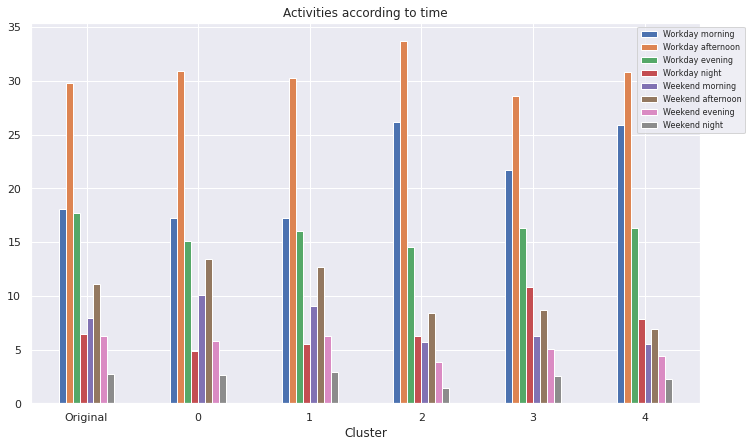

In [15]:
df_0_time = df_time[df_time["Cluster"] == 0]
df_0_time.drop("Cluster", axis = 1, inplace = True)
df_1_time = df_time[df_time["Cluster"] == 1]
df_1_time.drop("Cluster", axis = 1, inplace = True)
df_2_time = df_time[df_time["Cluster"] == 2]
df_2_time.drop("Cluster", axis = 1, inplace = True)
df_3_time = df_time[df_time["Cluster"] == 3]
df_3_time.drop("Cluster", axis = 1, inplace = True)
df_4_time = df_time[df_time["Cluster"] == 4]
df_4_time.drop("Cluster", axis = 1, inplace = True)
time_0_count = [0] * 8
time_1_count = [0] * 8
time_2_count = [0] * 8
time_3_count = [0] * 8
time_4_count = [0] * 8

i = 0
for column in df_0_time.columns:
  time_0_count[i] = df_0_time[column].sum()
  time_1_count[i] = df_1_time[column].sum()
  time_2_count[i] = df_2_time[column].sum()
  time_3_count[i] = df_3_time[column].sum()
  time_4_count[i] = df_4_time[column].sum()
  i += 1

data = [["Original", 427238157.32760704, 705121072.5695498, 418331438.61556035, 152078533.98669076, 187721626.85000673, 263235593.876108, 147923060.42165148, 63820201.376331285],
        ["0", time_0_count[0], time_0_count[1], time_0_count[2], time_0_count[3], time_0_count[4], time_0_count[5], time_0_count[6], time_0_count[7]],
        ["1", time_1_count[0], time_1_count[1], time_1_count[2], time_1_count[3], time_1_count[4], time_1_count[5], time_1_count[6], time_1_count[7]],
        ["2", time_2_count[0], time_2_count[1], time_2_count[2], time_2_count[3], time_2_count[4], time_2_count[5], time_2_count[6], time_2_count[7]],
        ["3", time_3_count[0], time_3_count[1], time_3_count[2], time_3_count[3], time_3_count[4], time_3_count[5], time_3_count[6], time_3_count[7]],
        ["4", time_4_count[0], time_4_count[1], time_4_count[2], time_4_count[3], time_4_count[4], time_4_count[5], time_4_count[6], time_4_count[7]]]
df_time = pd.DataFrame(data, columns = ["Cluster", "Workday morning", "Workday afternoon", "Workday evening", "Workday night", 
                                       "Weekend morning", "Weekend afternoon", "Weekend evening", "Weekend night"])
data = df_time.copy()

column_set = df_time.columns.drop("Cluster")
for column in column_set:
  for i in range(6):
    data[column][i] = np.around(((df_time[column][i]/(df_time.iloc[i, 1:].sum())) * 100), 2)

data.plot(x = "Cluster", y = ["Workday morning", "Workday afternoon", "Workday evening", "Workday night", 
                              "Weekend morning", "Weekend afternoon", "Weekend evening", "Weekend night"], kind = "bar")
plt.title('Activities according to time')
plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor = (0.9, 1), prop = {'size': 8})
plt.savefig('Time - 5 cluster - 6 PCA.png', dpi = 300)
plt.show()

In [16]:
data

,Cluster,Workday morning,Workday afternoon,Workday evening,Workday night,Weekend morning,Weekend afternoon,Weekend evening,Weekend night
0,Original,18.06,29.81,17.68,6.43,7.94,11.13,6.25,2.70
1,0,17.19,30.92,15.09,4.88,10.03,13.42,5.82,2.65
2,1,17.21,30.30,16.02,5.56,9.08,12.65,6.23,2.94
3,2,26.14,33.71,14.51,6.27,5.73,8.38,3.85,1.41
4,3,21.72,28.60,16.27,10.84,6.25,8.66,5.09,2.56
5,4,25.92,30.83,16.33,7.87,5.49,6.92,4.40,2.25


##K-Means (3)

In [4]:
df_pca = pd.DataFrame(df_pca, index = df_cat.index)

In [5]:
kmeans = KMeans(3)
identified_clusters = kmeans.fit_predict(df_pca)
df_pca.columns = ['Principal component 1', 'Principal component 2', 'Principal component 3', 'Principal component 4', 'Principal component 5', 'Principal component 6']

## Descrizione dei cluster

Valutiamo anzitutto le componenti che costituiscono i centroidi dei cluster.

In [ ]:
kmeans.cluster_centers_

array([[-1.86387718e+00,  4.26031706e-03,  2.20465931e-02,
        -2.80581540e-02, -1.69611871e-02, -3.26256613e-02],
       [ 9.40022616e+01, -2.19222048e+01,  5.98586511e+00,
         4.73150322e-01,  3.74327199e-01,  1.89289804e+00],
       [ 1.06951937e+02,  7.05260071e+01, -2.44052361e+01,
         4.68089521e+00,  2.54170649e+00,  1.06532095e+00]])

Descrizione dei centroidi:

0.   (-1.86, 0.004, 0.02, -0.03, 0.02, -0.03). 
1.   (94.00, -21.92, 5.99, 0.47, 0.37, 1.89).
2.   (106.95, 70.53, -24.41, 4.68, 2.54, 1.07).

Vediamo ora le differenze tra i vari cluster in termini di time, device e OS.

In [6]:
df['Principal component 1'] = df_pca['Principal component 1']
df['Principal component 2'] = df_pca['Principal component 2']
df['Principal component 3'] = df_pca['Principal component 3']
df['Principal component 4'] = df_pca['Principal component 4']
df['Principal component 5'] = df_pca['Principal component 5']
df['Principal component 6'] = df_pca['Principal component 6']
df['Cluster'] = identified_clusters

In [ ]:
for i in range(3):
  print(np.around((df['Cluster'].value_counts()[i])/len(df), 4)*100)

98.11999999999999
1.44
0.44


In [ ]:
df_0 = df[df['Cluster'] == 0]
df_0.describe()

In [ ]:
df_1 = df[df['Cluster'] == 1]
df_1.describe()

In [ ]:
df_2 = df[df['Cluster'] == 2]
df_2.describe()

In [7]:
plt.rcParams["figure.figsize"] = (12, 7)

### OS

In [8]:
df_os = df[["os_android", "os_ios", "os_linux", "os_osx", "os_windows", "Cluster"]]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


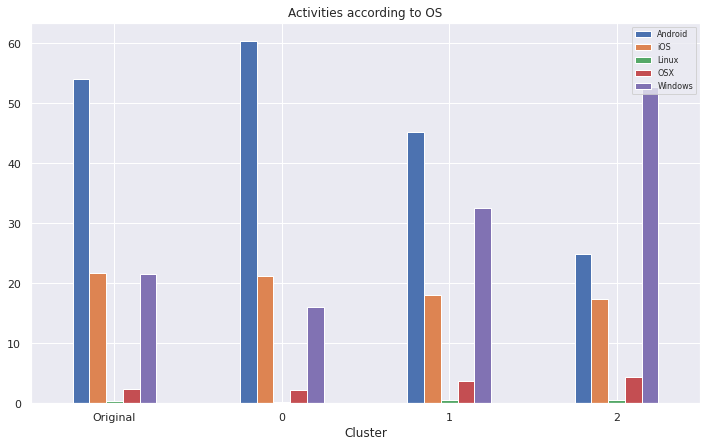

In [9]:
df_0_os = df_os[df_os["Cluster"] == 0]
df_0_os.drop("Cluster", axis = 1, inplace = True)
df_1_os = df_os[df_os["Cluster"] == 1]
df_1_os.drop("Cluster", axis = 1, inplace = True)
df_2_os = df_os[df_os["Cluster"] == 2]
df_2_os.drop("Cluster", axis = 1, inplace = True)
os_0_count = [0] * 5
os_1_count = [0] * 5
os_2_count = [0] * 5

i = 0
for column in df_0_os.columns:
  os_0_count[i] = df_0_os[column].value_counts()[1]
  os_1_count[i] = df_1_os[column].value_counts()[1]
  os_2_count[i] = df_2_os[column].value_counts()[1]
  i += 1

data = [["Original", 12285577.0, 4931163.0, 72503.0, 542380.0, 4880349.0],
        ["0", os_0_count[0], os_0_count[1], os_0_count[2], os_0_count[3], os_0_count[4]],
        ["1", os_1_count[0], os_1_count[1], os_1_count[2], os_1_count[3], os_1_count[4]],
        ["2", os_2_count[0], os_2_count[1], os_2_count[2], os_2_count[3], os_2_count[4]]]
df_os = pd.DataFrame(data, columns = ["Cluster", "Android", "iOS", "Linux", "OSX", "Windows"])
data = df_os.copy()

column_set = df_os.columns.drop("Cluster")
for column in column_set:
  for i in range(4):
    data[column][i] = np.around(((df_os[column][i]/(df_os.iloc[i, 1:].sum())) * 100), 2)

data.plot(x = "Cluster", y = ["Android", "iOS", "Linux", "OSX", "Windows"], kind = "bar")
plt.title('Activities according to OS')
plt.xticks(rotation = 0)
plt.legend(loc = 'upper right', prop = {'size': 8})
plt.savefig('OS - 3 cluster - 6 PCA.png', dpi = 300)
plt.show()

In [10]:
data

,Cluster,Android,iOS,Linux,OSX,Windows
0,Original,54.09,21.71,0.32,2.39,21.49
1,0,60.41,21.17,0.23,2.18,16.01
2,1,45.18,17.98,0.51,3.72,32.61
3,2,24.91,17.31,0.60,4.42,52.76


### Device

In [11]:
df_dev = df[["device_type", "Cluster"]]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


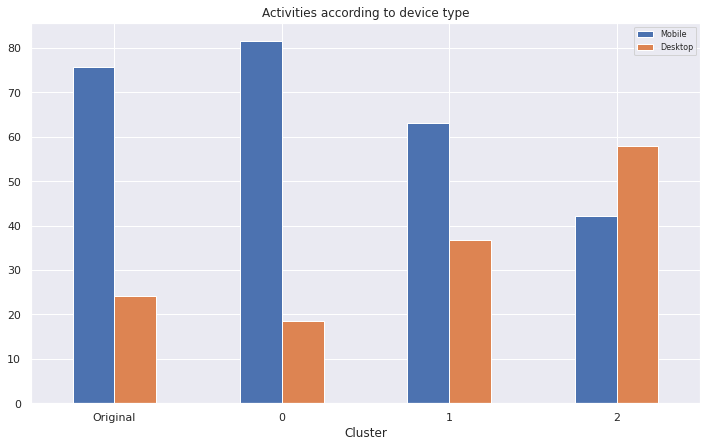

In [12]:
df_0_dev = df_dev[df_dev["Cluster"] == 0]
df_0_dev.drop("Cluster", axis = 1, inplace = True)
df_1_dev = df_dev[df_dev["Cluster"] == 1]
df_1_dev.drop("Cluster", axis = 1, inplace = True)
df_2_dev = df_dev[df_dev["Cluster"] == 2]
df_2_dev.drop("Cluster", axis = 1, inplace = True)
dev_0_count = [0] * 2
dev_1_count = [0] * 2
dev_2_count = [0] * 2

for i in range(2):
  dev_0_count[i] = df_0_dev['device_type'].value_counts()[i+1]
  dev_1_count[i] = df_1_dev['device_type'].value_counts()[i+1]
  dev_2_count[i] = df_2_dev['device_type'].value_counts()[i+1]

data = [["Original", 17219135.0, 5499030.0],
        ["0", dev_0_count[0], dev_0_count[1]], 
        ["1", dev_1_count[0], dev_1_count[1]], 
        ["2", dev_2_count[0], dev_2_count[1]]]
df_dev = pd.DataFrame(data, columns = ["Cluster", "Mobile", "Desktop"])
data = df_dev.copy()

column_set = df_dev.columns.drop("Cluster")
for column in column_set:
  for i in range(4):
    data[column][i] = np.around(((df_dev[column][i]/(df_dev.iloc[i, 1:].sum())) * 100), 2)

data.plot(x = "Cluster", y = ["Mobile", "Desktop"], kind = "bar")
plt.title('Activities according to device type')
plt.xticks(rotation = 0)
plt.legend(loc = 'upper right', prop = {'size': 8})
plt.savefig('Device - 3 cluster - 6 PCA.png', dpi = 300)
plt.show()

In [13]:
data

,Cluster,Mobile,Desktop
0,Original,75.79,24.21
1,0,81.57,18.43
2,1,63.15,36.85
3,2,42.19,57.81


### Time

In [14]:
df_time = df[["time1_workday_morning", "time1_workday_afternoon", "time1_workday_evening", "time1_workday_night", 
              "time1_weekend_morning", "time1_weekend_afternoon", "time1_weekend_evening", "time1_weekend_night", "Cluster"]]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


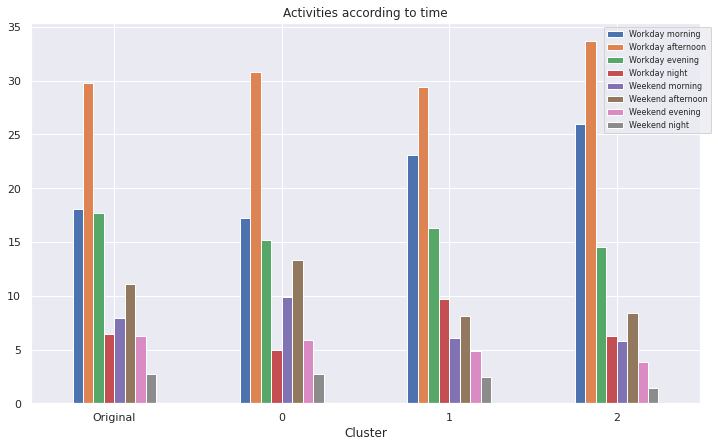

In [15]:
df_0_time = df_time[df_time["Cluster"] == 0]
df_0_time.drop("Cluster", axis = 1, inplace = True)
df_1_time = df_time[df_time["Cluster"] == 1]
df_1_time.drop("Cluster", axis = 1, inplace = True)
df_2_time = df_time[df_time["Cluster"] == 2]
df_2_time.drop("Cluster", axis = 1, inplace = True)
time_0_count = [0] * 8
time_1_count = [0] * 8
time_2_count = [0] * 8

i = 0
for column in df_0_time.columns:
  time_0_count[i] = df_0_time[column].sum()
  time_1_count[i] = df_1_time[column].sum()
  time_2_count[i] = df_2_time[column].sum()
  i += 1

data = [["Original", 427238157.32760704, 705121072.5695498, 418331438.61556035, 152078533.98669076, 187721626.85000673, 263235593.876108, 147923060.42165148, 63820201.376331285],
        ["0", time_0_count[0], time_0_count[1], time_0_count[2], time_0_count[3], time_0_count[4], time_0_count[5], time_0_count[6], time_0_count[7]],
        ["1", time_1_count[0], time_1_count[1], time_1_count[2], time_1_count[3], time_1_count[4], time_1_count[5], time_1_count[6], time_1_count[7]],
        ["2", time_2_count[0], time_2_count[1], time_2_count[2], time_2_count[3], time_2_count[4], time_2_count[5], time_2_count[6], time_2_count[7]]]
df_time = pd.DataFrame(data, columns = ["Cluster", "Workday morning", "Workday afternoon", "Workday evening", "Workday night", 
                                       "Weekend morning", "Weekend afternoon", "Weekend evening", "Weekend night"])
data = df_time.copy()

column_set = df_time.columns.drop("Cluster")
for column in column_set:
  for i in range(4):
    data[column][i] = np.around(((df_time[column][i]/(df_time.iloc[i, 1:].sum())) * 100), 2)

data.plot(x = "Cluster", y = ["Workday morning", "Workday afternoon", "Workday evening", "Workday night", 
                              "Weekend morning", "Weekend afternoon", "Weekend evening", "Weekend night"], kind = "bar")
plt.title('Activities according to time')
plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor = (0.85, 1), prop = {'size': 8})
plt.savefig('Time - 3 cluster - 6 PCA.png', dpi = 300)
plt.show()

In [16]:
data

,Cluster,Workday morning,Workday afternoon,Workday evening,Workday night,Weekend morning,Weekend afternoon,Weekend evening,Weekend night
0,Original,18.06,29.81,17.68,6.43,7.94,11.13,6.25,2.70
1,0,17.19,30.84,15.21,4.97,9.91,13.32,5.87,2.69
2,1,23.08,29.38,16.31,9.73,6.04,8.13,4.87,2.46
3,2,26.00,33.69,14.54,6.24,5.80,8.42,3.88,1.42
